In [1]:
#Imported Packages:

#Generic
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Data Modeling
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Data Visualization
from scipy.stats import iqr
from scipy.stats import skew
from scipy.stats import kurtosis, shapiro
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data=pd.read_csv('train.csv',keep_default_na=False,na_values=[" ", "#N/A", "#N/A N/A", "#NA", "-1.#IND", "-1.#QNAN", "-NaN", "-nan", "1.#IND", "1.#QNAN", "<NA>", "N/A", "NULL", "NaN", "n/a", "nan", "null","NA"])
test_data=pd.read_csv('test.csv',keep_default_na=False,na_values=[" ", "#N/A", "#N/A N/A", "#NA", "-1.#IND", "-1.#QNAN", "-NaN", "-nan", "1.#IND", "1.#QNAN", "<NA>", "N/A", "NULL", "NaN", "n/a", "nan", "null","NA"])
default_NA={'Alley':'NA','BsmtQual':'NA','BsmtCond':'NA','BsmtExposure':'NA',
            'BsmtFinType1':'NA','BsmtFinType2':'NA','FireplaceQu':'NA',
            'GarageType':'NA','GarageFinish':'NA',
            'GarageQual':'NA','GarageCond':'NA','PoolQC':'NA','Fence':'NA','MiscFeature':'NA'}
train_data=train_data.fillna(default_NA)
test_data=test_data.fillna(default_NA)

In [3]:
nulls = train_data.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0]/len(train_data))
    else:
        continue

LotFrontage 0.1773972602739726
MasVnrType 0.005479452054794521
MasVnrArea 0.005479452054794521
Electrical 0.0006849315068493151
GarageYrBlt 0.05547945205479452


In [4]:
nulls = test_data.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

MSZoning 4
LotFrontage 227
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 16
MasVnrArea 15
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
GarageYrBlt 78
GarageCars 1
GarageArea 1
SaleType 1


In [5]:
def remove_outliers_and_get_skewness(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier condition
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove the outliers
    filtered_data = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    # Calculate skewness
    column_skewness = skew(filtered_data[column_name], bias=False)

    return column_skewness
def count_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    print(Q1)
    print(Q3)
    IQR = Q3 - Q1

    # Define the outlier condition
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(lower_bound)
    print(upper_bound)

    # Identify the outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    # Return the number of outliers
    return len(outliers)

In [6]:
from synthetic_data_gen import augment_data
train_data_aug=augment_data(train_data)
train_data_aug

Generating 1460 samples for augmentation: 
Data set size increased from 1460 to 2920 samples following augmentation


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450.000000,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500.000000
1,2,20,RL,80.000000,9600.000000,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500.000000
2,3,60,RL,68.000000,11250.000000,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500.000000
3,4,70,RL,60.000000,9550.000000,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000.000000
4,5,60,RL,84.000000,14260.000000,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,1113_1,20,RL,72.755554,7103.179018,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,7,2006,WD,Normal,129974.314539
2916,1292_3,160,RM,21.131306,1683.784323,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2009,WD,Normal,119301.855793
2917,489_2,190,RL,59.965790,10726.735317,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2006,ConLD,Normal,160768.844815
2918,47_5,50,RL,48.017215,12869.142474,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,8,2009,WD,Abnorml,238018.034475


In [7]:
X_train,X_valid,y_train,y_valid=train_test_split(train_data_aug.loc[:,train_data.columns!='SalesPrice'],train_data_aug.loc[:,train_data.columns=='SalesPrice'],test_size=0.2,random_state=42)
training = X_train.join(y_train)
validation = X_valid.join(y_valid)
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2651,640_2,120,RL,53.224636,3997.445023,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,10,2006,New,Partial,265387.606452
1709,151_1,20,RL,120.023825,10258.367529,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,1,2007,WD,Normal,121744.249120
869,870,60,RL,80.000000,9938.000000,Pave,NA,Reg,Lvl,AllPub,...,0,NA,GdPrv,NA,0,6,2010,WD,Normal,236000.000000
2355,8_1,60,RL,NaN,10282.578342,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,Shed,350,11,2009,WD,Normal,200579.186432
2915,1113_1,20,RL,72.755554,7103.179018,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,7,2006,WD,Normal,129974.314539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,973_1,120,RL,55.572236,7891.911422,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2010,WD,Normal,98872.586164
1095,1096,20,RL,78.000000,9317.000000,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,3,2007,WD,Normal,176432.000000
1130,1131,50,RL,65.000000,7804.000000,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,12,2009,WD,Normal,135000.000000
1294,1295,20,RL,60.000000,8172.000000,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2006,WD,Normal,115000.000000


In [8]:
training.to_csv('training.csv',index=False)
validation.to_csv('validation.csv',index=False)

In [9]:
nulls = training.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

LotFrontage 428
MasVnrType 11
MasVnrArea 11
Electrical 1
GarageYrBlt 123


In [10]:
nulls = validation.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

LotFrontage 100
MasVnrType 3
MasVnrArea 3
Electrical 1
GarageYrBlt 30


In [11]:
nulls = test_data.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

MSZoning 4
LotFrontage 227
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 16
MasVnrArea 15
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
GarageYrBlt 78
GarageCars 1
GarageArea 1
SaleType 1


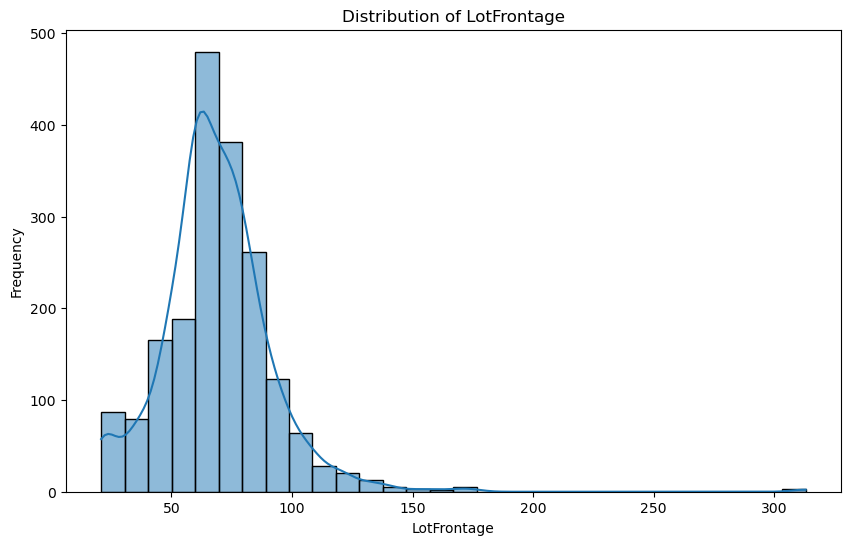

Skewness of LotFrontage before Imputing: 2.113196513799668
Skewness of LotFrontage after removing outliers: 0.1725412228840625
58.25315218856536
80.0
25.632880471413394
112.62027171715197
Number of outliers in LotFrontage: 139


In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(training['LotFrontage'], kde=True, bins=30)
plt.title(f'Distribution of LotFrontage')
plt.xlabel('LotFrontage')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['LotFrontage'].dropna())  # dropna() to ignore missing values
print(f'Skewness of LotFrontage before Imputing: {feature_skewness}')
skewness=remove_outliers_and_get_skewness(training,'LotFrontage')
print(f'Skewness of LotFrontage after removing outliers: {skewness}')
num_outliers = count_outliers(training, 'LotFrontage')
print(f'Number of outliers in LotFrontage: {num_outliers}')

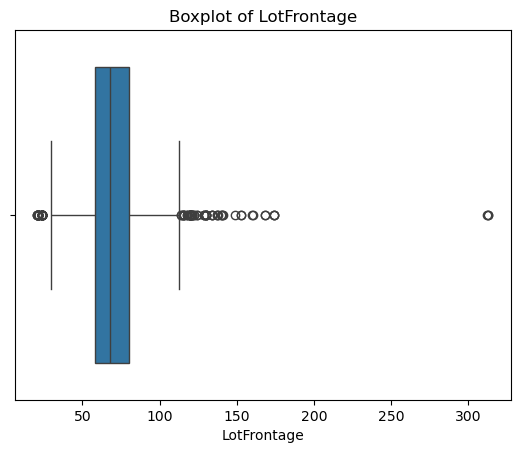

In [13]:
sns.boxplot(data=training, x='LotFrontage')

# Add labels and a title
plt.xlabel('LotFrontage')
plt.title('Boxplot of LotFrontage')

# Show the plot
plt.show()

In [14]:
training['LotFrontage_original']=training['LotFrontage']
training['MasVnrArea_original']=training['MasVnrArea']

In [15]:
from eda_imputation import fill_missing_values
training,validation,test_data=fill_missing_values(training,test_data,validation)

In [16]:
#typo error to resolve
test_data.loc[test_data['GarageYrBlt'] == 2207,'GarageYrBlt']=2007
test_data.loc[test_data['GarageYrBlt'] > test_data['YrSold'], 'GarageYrBlt'] = test_data['YrSold']

In [17]:
nulls = training.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if (row[0] > 0) and not (index.endswith('_original')):
        print(index, row[0])
    else:
        continue

In [18]:
nulls = validation.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

In [19]:
nulls = test_data.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

In [20]:
training.to_csv('training_filled.csv',index=False)
validation.to_csv('validation_filled.csv',index=False)
test_data.to_csv('test_filled.csv',index=False)

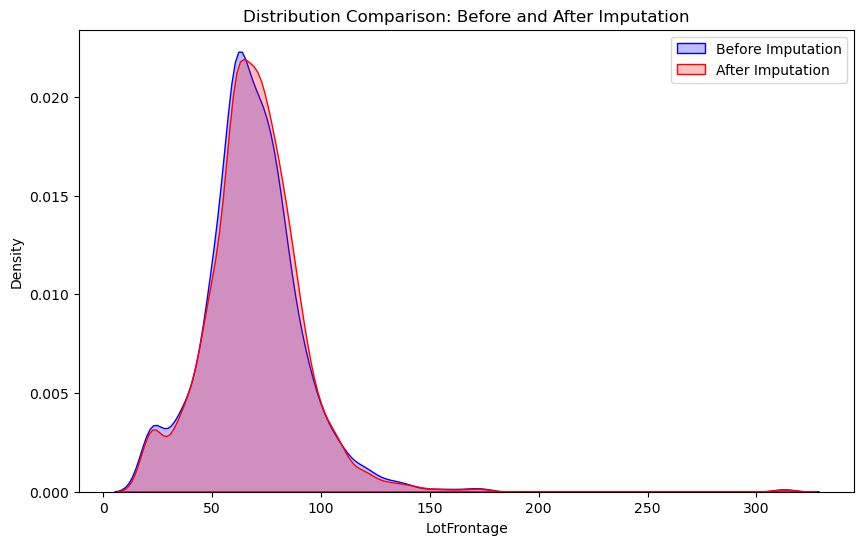

Skewness of LotFrontage after Imputing: 1.8923080266971397
Skewness of LotFrontage after removing outliers: 0.06688673631247789
59.70873560321543
80.11003057200168
29.10679315003606
110.71197302518104
Number of outliers in LotFrontage: 154


In [21]:
plt.figure(figsize=(10, 6))

# Plot original data
sns.kdeplot(training['LotFrontage_original'], label='Before Imputation', color='blue', shade=True)

# Plot imputed data
sns.kdeplot(training['LotFrontage'], label='After Imputation', color='red', shade=True)

# Add labels and title
plt.title('Distribution Comparison: Before and After Imputation')
plt.xlabel('LotFrontage')
plt.ylabel('Density')

# Show legend
plt.legend()

# Show plot
plt.show()
feature_skewness = skew(training['LotFrontage'].dropna())  # dropna() to ignore missing values
print(f'Skewness of LotFrontage after Imputing: {feature_skewness}')
skewness=remove_outliers_and_get_skewness(training,'LotFrontage')
print(f'Skewness of LotFrontage after removing outliers: {skewness}')
num_outliers = count_outliers(training, 'LotFrontage')
print(f'Number of outliers in LotFrontage: {num_outliers}')

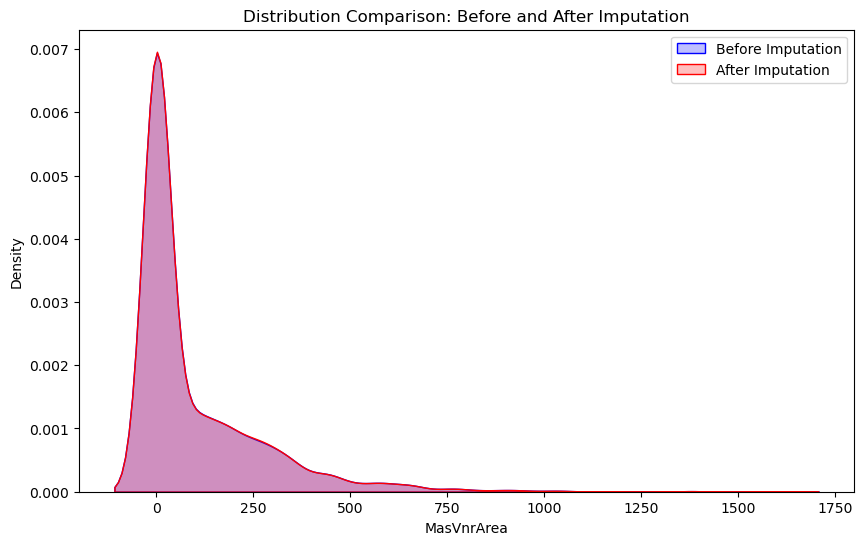

Skewness of LotFrontage after Imputing: 2.618735348136315
Skewness of LotFrontage after removing outliers: 1.46795221449205
0.0
153.2306317577408
-229.8459476366112
383.07657939435205
Number of outliers in LotFrontage: 152


In [22]:
plt.figure(figsize=(10, 6))

# Plot original data
sns.kdeplot(training['MasVnrArea_original'], label='Before Imputation', color='blue', shade=True)

# Plot imputed data
sns.kdeplot(training['MasVnrArea'], label='After Imputation', color='red', shade=True)

# Add labels and title
plt.title('Distribution Comparison: Before and After Imputation')
plt.xlabel('MasVnrArea')
plt.ylabel('Density')

# Show legend
plt.legend()

# Show plot
plt.show()
feature_skewness = skew(training['MasVnrArea'].dropna())  # dropna() to ignore missing values
print(f'Skewness of LotFrontage after Imputing: {feature_skewness}')
skewness=remove_outliers_and_get_skewness(training,'MasVnrArea')
print(f'Skewness of LotFrontage after removing outliers: {skewness}')
num_outliers = count_outliers(training, 'MasVnrArea')
print(f'Number of outliers in LotFrontage: {num_outliers}')

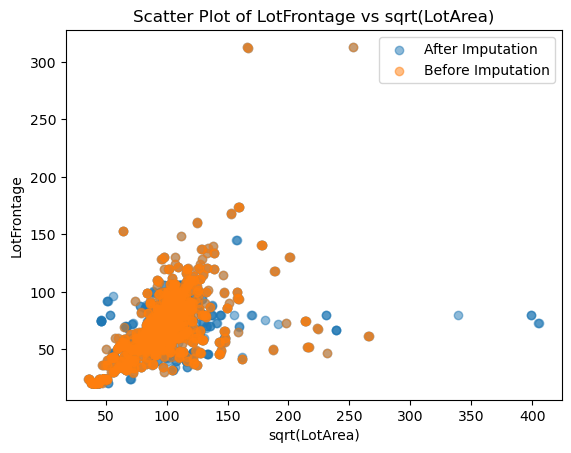

In [23]:
plt.scatter(np.sqrt(training['LotArea']), training['LotFrontage'], label='After Imputation', alpha=0.5)
plt.scatter(np.sqrt(training['LotArea']), training['LotFrontage_original'], label='Before Imputation', alpha=0.5)
plt.xlabel('sqrt(LotArea)')
plt.ylabel('LotFrontage')
plt.legend()
plt.title("Scatter Plot of LotFrontage vs sqrt(LotArea)")
plt.show()

In [24]:
training.drop(columns=[col for col in training.columns if col.endswith('_original')], inplace=True)
training

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,640_2,120,RL,53.224636,3997.445023,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,10,2006,New,Partial,265387.606452
1,151_1,20,RL,120.023825,10258.367529,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,1,2007,WD,Normal,121744.249120
2,870,60,RL,80.000000,9938.000000,Pave,NA,Reg,Lvl,AllPub,...,0,NA,GdPrv,NA,0,6,2010,WD,Normal,236000.000000
3,8_1,60,RL,94.000000,10282.578342,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,Shed,350,11,2009,WD,Normal,200579.186432
4,1113_1,20,RL,72.755554,7103.179018,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,7,2006,WD,Normal,129974.314539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,973_1,120,RL,55.572236,7891.911422,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2010,WD,Normal,98872.586164
2332,1096,20,RL,78.000000,9317.000000,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,3,2007,WD,Normal,176432.000000
2333,1131,50,RL,65.000000,7804.000000,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,12,2009,WD,Normal,135000.000000
2334,1295,20,RL,60.000000,8172.000000,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2006,WD,Normal,115000.000000


# Analysis and Transformations to the Response Variable

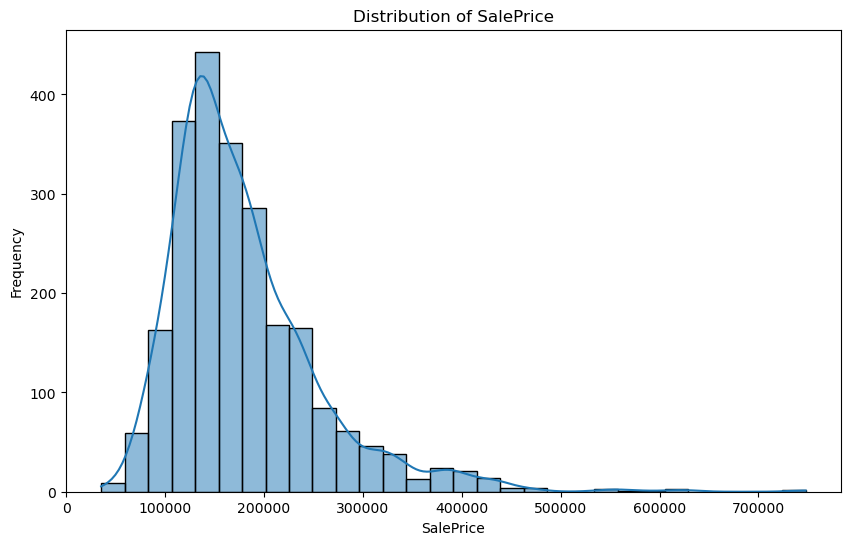

Skewness of SalePrice: 1.8402548459948636


In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(training['SalePrice'], kde=True, bins=30)
plt.title(f'Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['SalePrice'].dropna())  # dropna() to ignore missing values
print(f'Skewness of SalePrice: {feature_skewness}')

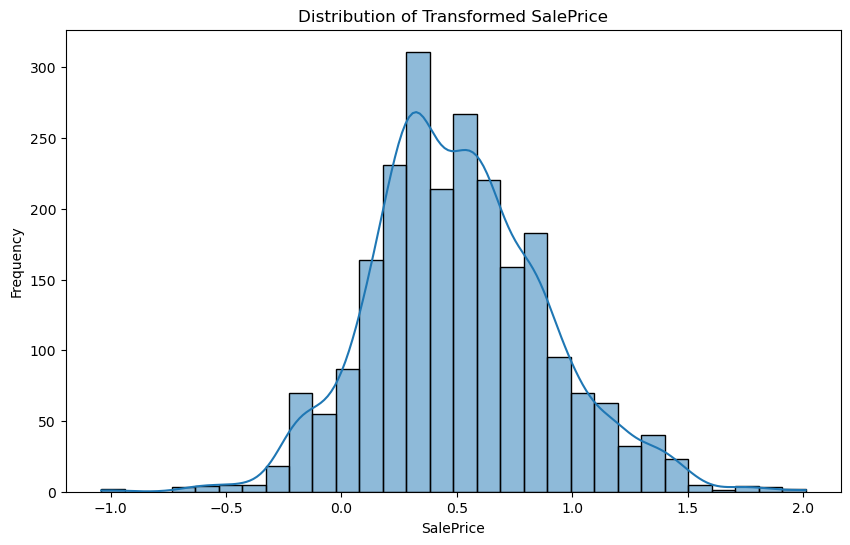

Skewness of SalePrice after transformation: 0.27528912909483094


In [26]:
training['SalePrice']=np.log(training['SalePrice']/100000)
validation['SalePrice']=np.log(validation['SalePrice']/100000)
plt.figure(figsize=(10, 6))
sns.histplot(training['SalePrice'], kde=True, bins=30)
plt.title(f'Distribution of Transformed SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['SalePrice'].dropna())  # dropna() to ignore missing values
print(f'Skewness of SalePrice after transformation: {feature_skewness}')

# Feature Engineering

### Create New Features

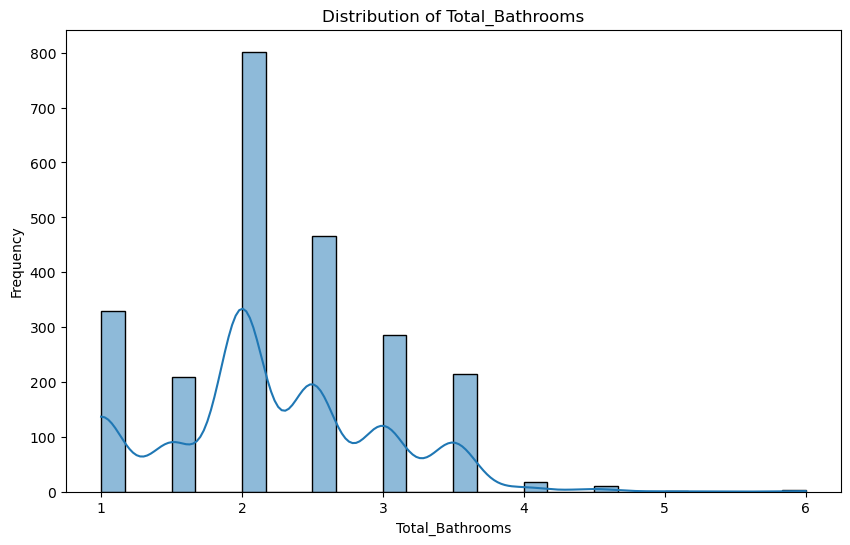

Skewness of Total_Bathrooms: 0.32372464837696996


In [27]:
training['Total_Bathrooms'] = (training['FullBath'] + (0.5 * training['HalfBath']) +
                               training['BsmtFullBath'] + (0.5 * training['BsmtHalfBath']))
validation['Total_Bathrooms'] = (validation['FullBath'] + (0.5 * validation['HalfBath']) +
                               validation['BsmtFullBath'] + (0.5 * validation['BsmtHalfBath']))
test_data['Total_Bathrooms'] = (test_data['FullBath'] + (0.5 *test_data['HalfBath']) +
                               test_data['BsmtFullBath'] + (0.5 * test_data['BsmtHalfBath']))
plt.figure(figsize=(10, 6))
sns.histplot(training['Total_Bathrooms'], kde=True, bins=30)
plt.title(f'Distribution of Total_Bathrooms')
plt.xlabel('Total_Bathrooms')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['Total_Bathrooms'].dropna())  # dropna() to ignore missing values
print(f'Skewness of Total_Bathrooms: {feature_skewness}')

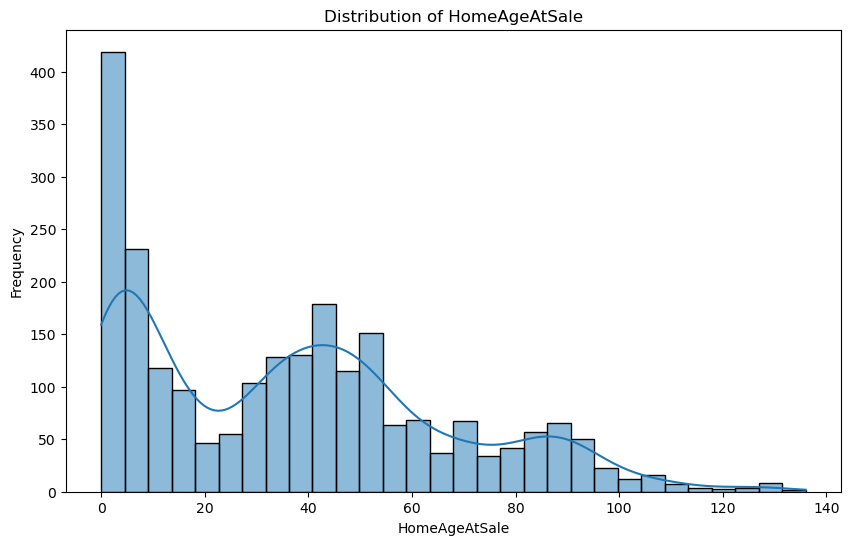

Skewness of HomeAgeAtSale: 0.6233792557402686


In [28]:
training['HomeAgeAtSale'] = training['YrSold'] - training['YearBuilt']
validation['HomeAgeAtSale'] = validation['YrSold'] - validation['YearBuilt']
test_data['HomeAgeAtSale'] = test_data['YrSold'] - test_data['YearBuilt']
plt.figure(figsize=(10, 6))
sns.histplot(training['HomeAgeAtSale'], kde=True, bins=30)
plt.title(f'Distribution of HomeAgeAtSale')
plt.xlabel('HomeAgeAtSale')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['HomeAgeAtSale'].dropna())  # dropna() to ignore missing values
print(f'Skewness of HomeAgeAtSale: {feature_skewness}')

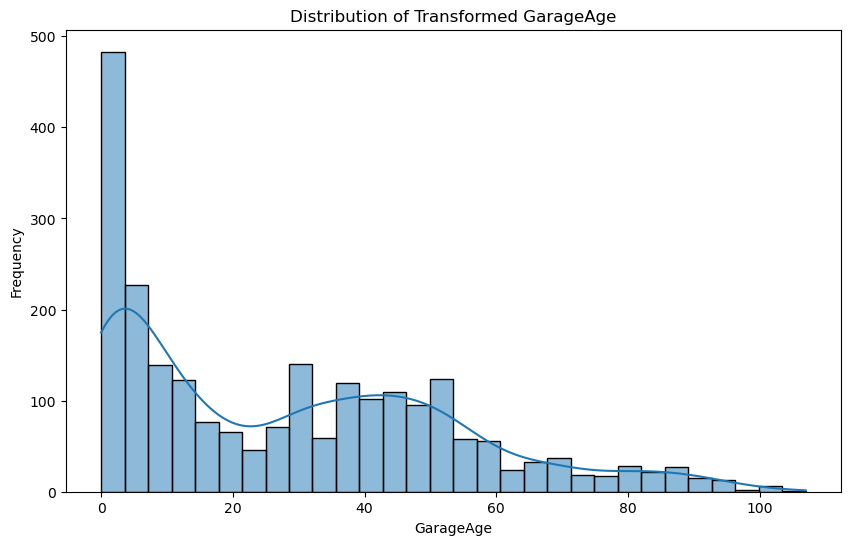

Skewness of GarageAge after transformation: 0.6798022369138778


In [29]:
training['GarageAge'] = training.apply(
    lambda row: row['YrSold'] - row['GarageYrBlt'] if row['GarageYrBlt'] != 0 else 0,
    axis=1
)
validation['GarageAge'] = validation.apply(
    lambda row: row['YrSold'] - row['GarageYrBlt'] if row['GarageYrBlt'] != 0 else 0,
    axis=1
)
test_data['GarageAge'] = test_data.apply(
    lambda row: row['YrSold'] - row['GarageYrBlt'] if row['GarageYrBlt'] != 0 else 0,
    axis=1
)
plt.figure(figsize=(10, 6))
sns.histplot(training['GarageAge'], kde=True, bins=30)
plt.title(f'Distribution of Transformed GarageAge')
plt.xlabel('GarageAge')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['GarageAge'].dropna())  # dropna() to ignore missing values
print(f'Skewness of GarageAge after transformation: {feature_skewness}')

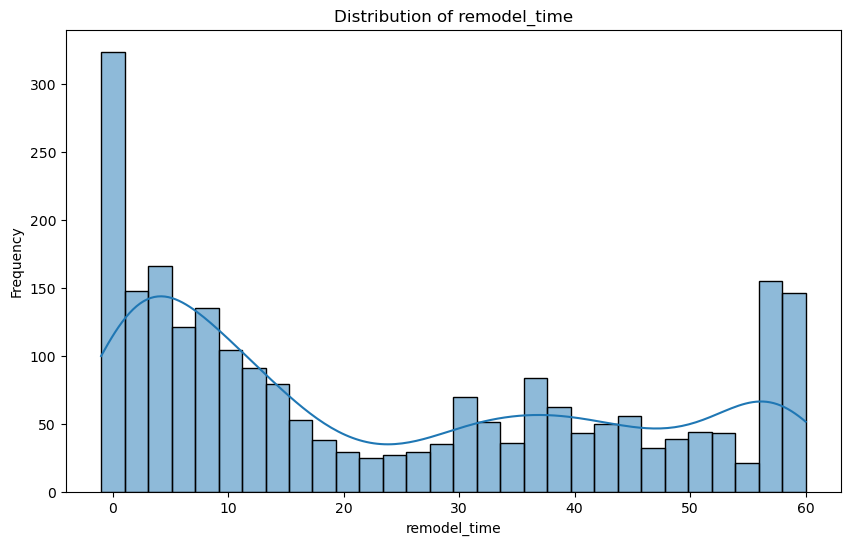

Skewness of remodel_time: 0.45398761512838826


In [30]:
training['remodel_time'] = training['YrSold'] - training['YearRemodAdd']
validation['remodel_time'] = validation['YrSold'] - validation['YearRemodAdd']
test_data['remodel_time'] = test_data['YrSold'] - test_data['YearRemodAdd']
plt.figure(figsize=(10, 6))
sns.histplot(training['remodel_time'], kde=True, bins=30)
plt.title(f'Distribution of remodel_time')
plt.xlabel('remodel_time')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['remodel_time'].dropna())  # dropna() to ignore missing values
print(f'Skewness of remodel_time: {feature_skewness}')

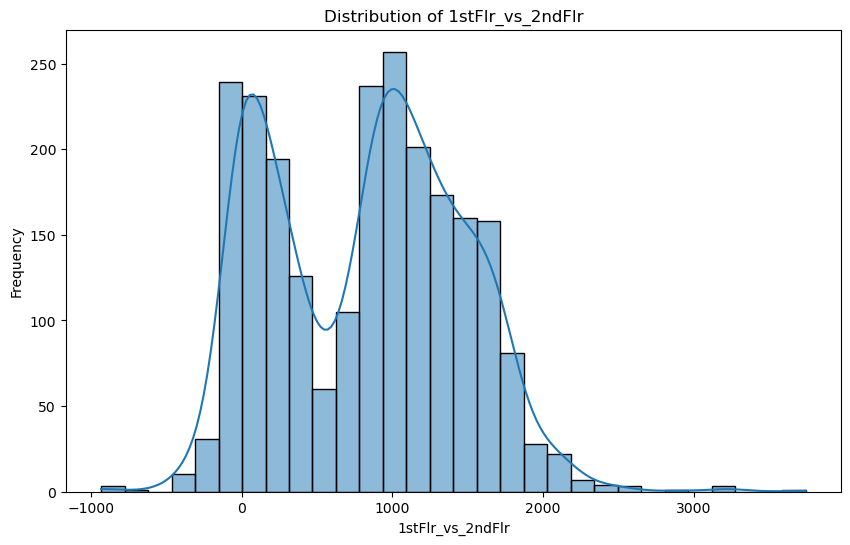

Skewness of 1stFlr_vs_2ndFlr: 0.13940337514301487


In [31]:
training['1stFlr_vs_2ndFlr'] = training['1stFlrSF'] - training['2ndFlrSF']
validation['1stFlr_vs_2ndFlr'] = validation['1stFlrSF'] - validation['2ndFlrSF']
test_data['1stFlr_vs_2ndFlr'] = test_data['1stFlrSF'] - test_data['2ndFlrSF']
plt.figure(figsize=(10, 6))
sns.histplot(training['1stFlr_vs_2ndFlr'], kde=True, bins=30)
plt.title(f'Distribution of 1stFlr_vs_2ndFlr')
plt.xlabel('1stFlr_vs_2ndFlr')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['1stFlr_vs_2ndFlr'].dropna())  # dropna() to ignore missing values
print(f'Skewness of 1stFlr_vs_2ndFlr: {feature_skewness}')

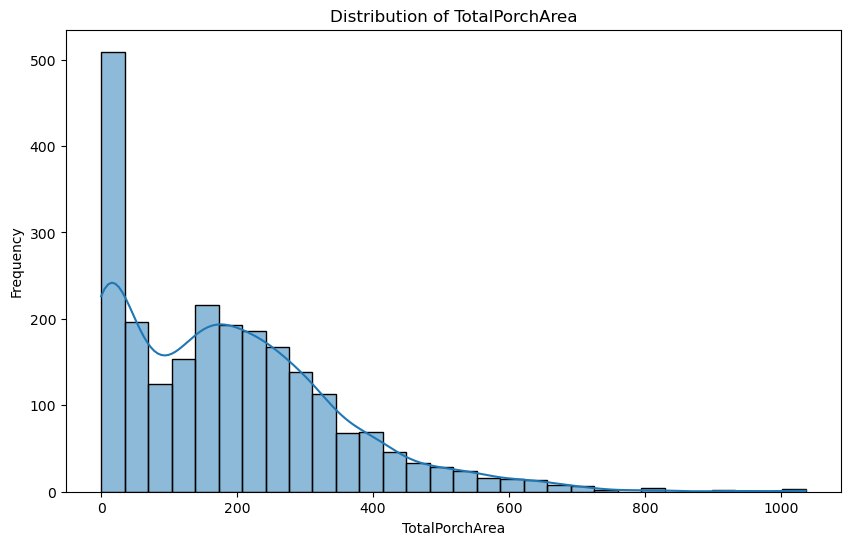

Skewness of TotalPorchArea: 1.0385527672374202


In [32]:
training['TotalPorchArea'] = training[['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']].sum(axis=1)
validation['TotalPorchArea'] = validation[['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']].sum(axis=1)
test_data['TotalPorchArea'] = test_data[['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']].sum(axis=1)
# training['TotalPorchArea']=np.sqrt(training['TotalPorchArea'])
# validation['TotalPorchArea']=np.sqrt(validation['TotalPorchArea'])
# test_data['TotalPorchArea']=np.sqrt(test_data['TotalPorchArea'])
plt.figure(figsize=(10, 6))
sns.histplot(training['TotalPorchArea'], kde=True, bins=30)
plt.title(f'Distribution of TotalPorchArea')
plt.xlabel('TotalPorchArea')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['TotalPorchArea'].dropna())  # dropna() to ignore missing values
print(f'Skewness of TotalPorchArea: {feature_skewness}')

In [33]:
def reposition_target_col(df,target_col):
    temp = df.pop(target_col)
    df[target_col] = temp
    return df
training=reposition_target_col(training,'SalePrice')
validation=reposition_target_col(validation,'SalePrice')

### Reorganize Nominal Categories

In [34]:
import json
with open("nc_mapping.json", "r") as json_file:
    nc_mapping = json.load(json_file)
nc_mapping['MSSubClass'] = {int(k): v for k, v in nc_mapping['MSSubClass'].items()}
print(nc_mapping['MSSubClass'])
for key in nc_mapping:
    if key in training.columns:
        training[key] = training[key].map(nc_mapping[key]).fillna('Other')
        validation[key] = validation[key].map(nc_mapping[key]).fillna('Other')
        test_data[key] = test_data[key].map(nc_mapping[key]).fillna('Other')

{20: '1-Story', 30: '1-Story', 40: 'Multi/Split-Level', 45: '1.5-Story', 50: '1.5-Story', 60: '2-Story', 70: '2-Story', 75: 'Multi/Split-Level', 80: 'Multi/Split-Level', 85: 'Multi/Split-Level', 90: 'Duplex/Multi-Family', 120: '1-Story', 150: '1.5-Story', 160: '2-Story', 180: 'Multi/Split-Level', 190: 'Duplex/Multi-Family'}


# Create new Nominal Features

In [35]:
training['has_garage']=np.where(training['GarageYrBlt']==0,0,1)
validation['has_garage']=np.where(validation['GarageYrBlt']==0,0,1)
test_data['has_garage']=np.where(test_data['GarageYrBlt']==0,0,1)

In [36]:
training['has_bsmt']=np.where(training['BsmtQual']=='NA',0,1)
validation['has_bsmt']=np.where(validation['BsmtQual']=='NA',0,1)
test_data['has_bsmt']=np.where(test_data['BsmtQual']=='NA',0,1)

In [37]:
training['CenturyBuilt'] = training['YearBuilt'].apply(lambda x: 1 if x < 2000 else 0)
validation['CenturyBuilt'] = validation['YearBuilt'].apply(lambda x: 1 if x < 2000 else 0)
test_data['CenturyBuilt'] = test_data['YearBuilt'].apply(lambda x: 1 if x < 2000 else 0)

In [38]:
training['Remodeled'] = (training['YearRemodAdd'] > training['YearBuilt']).astype(int)
validation['Remodeled'] = (validation['YearRemodAdd'] > validation['YearBuilt']).astype(int)
test_data['Remodeled'] = (test_data['YearRemodAdd'] > test_data['YearBuilt']).astype(int)

In [39]:
training['Vintage'] = training['YearBuilt'].apply(lambda x: '19th Century' if x < 1900 else '20th Century' if x < 2000 else '21st Century')
validation['Vintage'] = validation['YearBuilt'].apply(lambda x: '19th Century' if x < 1900 else '20th Century' if x < 2000 else '21st Century')
test_data['Vintage'] = test_data['YearBuilt'].apply(lambda x: '19th Century' if x < 1900 else '20th Century' if x < 2000 else '21st Century')

In [40]:
training['LuxuryCount'] = (training['Fireplaces'] > 0).astype(int) + (training['GarageCars'] > 2).astype(int) + (training['FullBath'] > 2).astype(int)
validation['LuxuryCount'] = (validation['Fireplaces'] > 0).astype(int) + (validation['GarageCars'] > 2).astype(int) + (validation['FullBath'] > 2).astype(int)
test_data['LuxuryCount'] = (test_data['Fireplaces'] > 0).astype(int) + (test_data['GarageCars'] > 2).astype(int) + (test_data['FullBath'] > 2).astype(int)

In [41]:
training['HasOutdoorSpace'] = ((training['OpenPorchSF'] > 0) | 
                         (training['EnclosedPorch'] > 0) | 
                         (training['WoodDeckSF'] > 0)).astype(int)
validation['HasOutdoorSpace'] = ((validation['OpenPorchSF'] > 0) | 
                         (validation['EnclosedPorch'] > 0) | 
                         (validation['WoodDeckSF'] > 0)).astype(int)
test_data['HasOutdoorSpace'] = ((test_data['OpenPorchSF'] > 0) | 
                         (test_data['EnclosedPorch'] > 0) | 
                         (test_data['WoodDeckSF'] > 0)).astype(int)

In [42]:
training['newlybuilt']=np.where(training['HomeAgeAtSale']==0,1,0)
validation['newlybuilt']=np.where(validation['HomeAgeAtSale']==0,1,0)
test_data['newlybuilt']=np.where(test_data['HomeAgeAtSale']==0,1,0)

In [43]:
training['has_EnclosedPorch']=np.where(training['EnclosedPorch']==0,0,1)
validation['has_EnclosedPorch']=np.where(validation['EnclosedPorch']==0,0,1)
test_data['has_EnclosedPorch']=np.where(test_data['EnclosedPorch']==0,0,1)

In [44]:
training['has_3SsnPorch']=np.where(training['3SsnPorch']==0,0,1)
validation['has_3SsnPorch']=np.where(validation['3SsnPorch']==0,0,1)
test_data['has_3SsnPorch']=np.where(test_data['3SsnPorch']==0,0,1)

In [45]:
training['has_ScreenPorch']=np.where(training['ScreenPorch']==0,0,1)
validation['has_ScreenPorch']=np.where(validation['ScreenPorch']==0,0,1)
test_data['has_ScreenPorch']=np.where(test_data['ScreenPorch']==0,0,1)

In [46]:
training=reposition_target_col(training,'SalePrice')
validation=reposition_target_col(validation,'SalePrice')

# Create Ordinal Features

In [47]:
training['ExteriorScore'] = training['ExterQual'].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}) + \
                      training['ExterCond'].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
validation['ExteriorScore'] = validation['ExterQual'].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}) + \
                      validation['ExterCond'].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
test_data['ExteriorScore'] = test_data['ExterQual'].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}) + \
                      test_data['ExterCond'].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

In [48]:
training["Interior_Finish_Score"] = (training["ExterQual"].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}) +  
                                training["KitchenQual"].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}) +  
                                training["FireplaceQu"].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, na_action='ignore'))
validation["Interior_Finish_Score"] = (validation["ExterQual"].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}) +  
                                validation["KitchenQual"].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}) +  
                                validation["FireplaceQu"].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, na_action='ignore'))
test_data["Interior_Finish_Score"] = (test_data["ExterQual"].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}) +  
                                test_data["KitchenQual"].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}) +  
                                test_data["FireplaceQu"].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, na_action='ignore'))

In [49]:
#training["Basement_Score"] = (training["BsmtQual"].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, na_action='ignore') +  
#                          training["BsmtCond"].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, na_action='ignore') +  
#                          training["BsmtFinType1"].map({'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}, na_action='ignore'))
#validation["Basement_Score"] = (validation["BsmtQual"].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, na_action='ignore') +  
#                          validation["BsmtCond"].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, na_action='ignore') +  
#                          validation["BsmtFinType1"].map({'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}, na_action='ignore'))
#test_data["Basement_Score"] = (test_data["BsmtQual"].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, na_action='ignore') +  
#                          test_data["BsmtCond"].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, na_action='ignore') +  
#                          test_data["BsmtFinType1"].map({'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}, na_action='ignore'))

In [50]:
training=reposition_target_col(training,'SalePrice')
validation=reposition_target_col(validation,'SalePrice')

### Transform Features

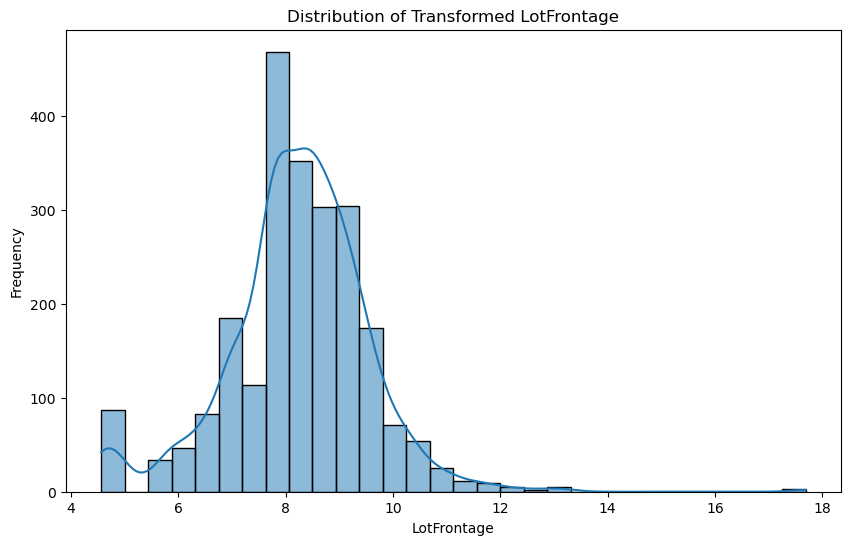

Skewness of LotFrontage after transformation: 0.13874992301324618


In [51]:
training['LotFrontage']=np.sqrt(training['LotFrontage'])
validation['LotFrontage']=np.sqrt(validation['LotFrontage'])
test_data['LotFrontage']=np.sqrt(test_data['LotFrontage'])
plt.figure(figsize=(10, 6))
sns.histplot(training['LotFrontage'], kde=True, bins=30)
plt.title(f'Distribution of Transformed LotFrontage')
plt.xlabel('LotFrontage')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['LotFrontage'].dropna())  # dropna() to ignore missing values
print(f'Skewness of LotFrontage after transformation: {feature_skewness}')

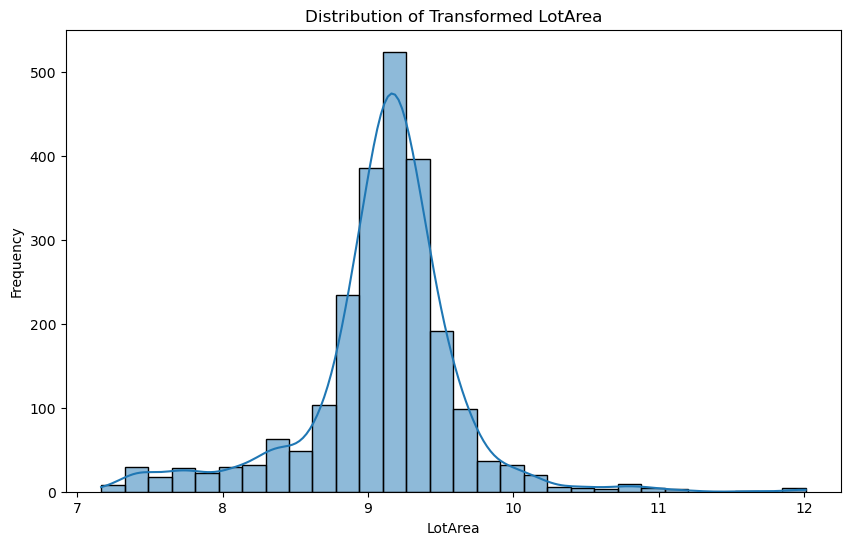

Skewness of LotArea after transformation: -0.38006320427953555


In [52]:
training['LotArea']=np.log1p(training['LotArea'])
validation['LotArea']=np.log1p(validation['LotArea'])
test_data['LotArea']=np.log1p(test_data['LotArea'])
plt.figure(figsize=(10, 6))
sns.histplot(training['LotArea'], kde=True, bins=30)
plt.title(f'Distribution of Transformed LotArea')
plt.xlabel('LotArea')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['LotArea'].dropna())  # dropna() to ignore missing values
print(f'Skewness of LotArea after transformation: {feature_skewness}')

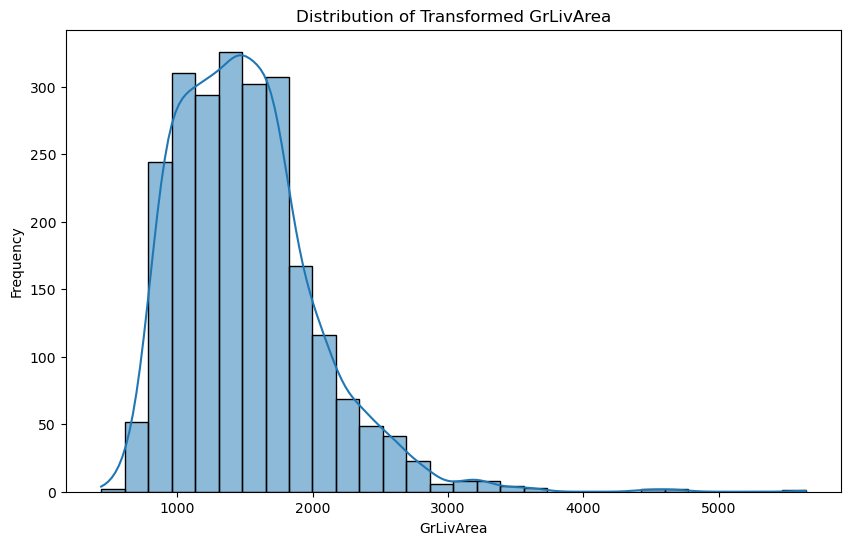

Skewness of GrLivArea after transformation: 1.3181931436791


In [53]:
#training['GrLivArea']=np.sqrt(training['GrLivArea'])
#validation['GrLivArea']=np.sqrt(validation['GrLivArea'])
#test_data['GrLivArea']=np.sqrt(test_data['GrLivArea'])
plt.figure(figsize=(10, 6))
sns.histplot(training['GrLivArea'], kde=True, bins=30)
plt.title(f'Distribution of Transformed GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['GrLivArea'].dropna())  # dropna() to ignore missing values
print(f'Skewness of GrLivArea after transformation: {feature_skewness}')

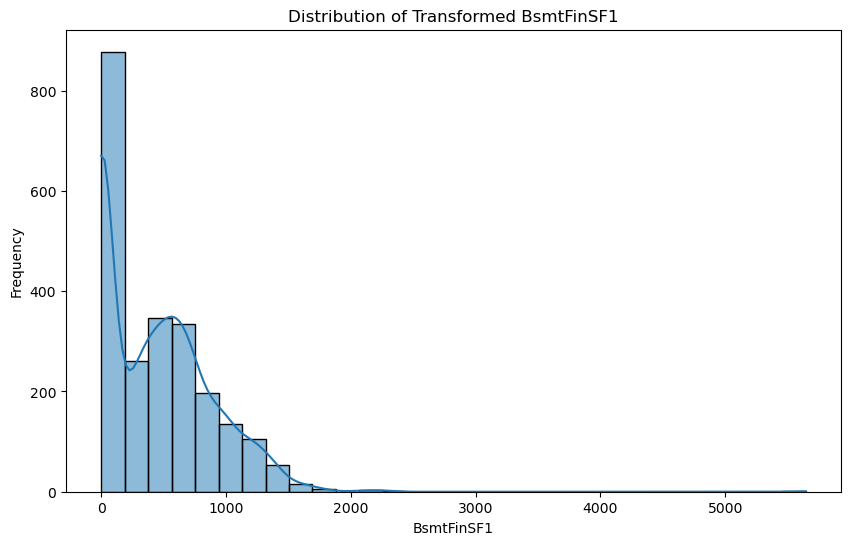

Skewness of BsmtFinSF1 after transformation: 1.3969668157337347


In [54]:
#training['BsmtFinSF1']=np.log1p(training['BsmtFinSF1'])
#validation['BsmtFinSF1']=np.log1p(validation['BsmtFinSF1'])
#test_data['BsmtFinSF1']=np.log1p(test_data['BsmtFinSF1'])
plt.figure(figsize=(10, 6))
sns.histplot(training['BsmtFinSF1'], kde=True, bins=30)
plt.title(f'Distribution of Transformed BsmtFinSF1')
plt.xlabel('BsmtFinSF1')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['BsmtFinSF1'].dropna())  # dropna() to ignore missing values
print(f'Skewness of BsmtFinSF1 after transformation: {feature_skewness}')

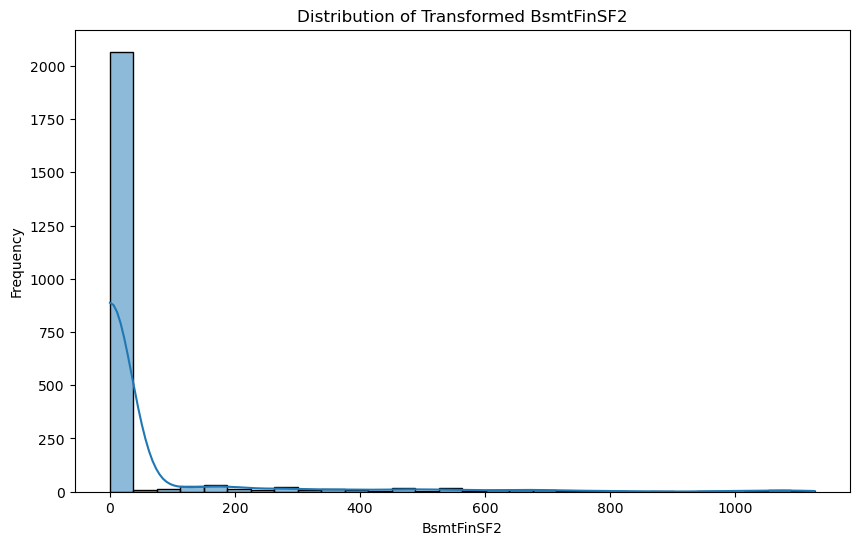

Skewness of BsmtFinSF2 after transformation: 4.159089911766878


In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(training['BsmtFinSF2'], kde=True, bins=30)
plt.title(f'Distribution of Transformed BsmtFinSF2')
plt.xlabel('BsmtFinSF2')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['BsmtFinSF2'].dropna())  # dropna() to ignore missing values
print(f'Skewness of BsmtFinSF2 after transformation: {feature_skewness}')

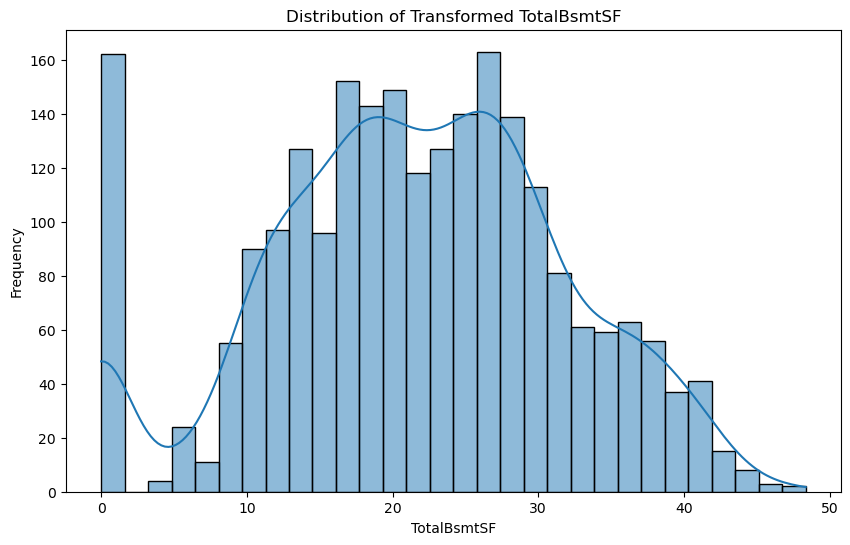

Skewness of TotalBsmtSF after transformation: -0.18015923612566717


In [56]:
training['TotalBsmtSF']=np.sqrt(training['TotalBsmtSF'])
validation['TotalBsmtSF']=np.sqrt(validation['TotalBsmtSF'])
test_data['TotalBsmtSF']=np.sqrt(test_data['TotalBsmtSF'])
plt.figure(figsize=(10, 6))
sns.histplot(training['TotalBsmtSF'], kde=True, bins=30)
plt.title(f'Distribution of Transformed TotalBsmtSF')
plt.xlabel('TotalBsmtSF')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['TotalBsmtSF'].dropna())  # dropna() to ignore missing values
print(f'Skewness of TotalBsmtSF after transformation: {feature_skewness}')

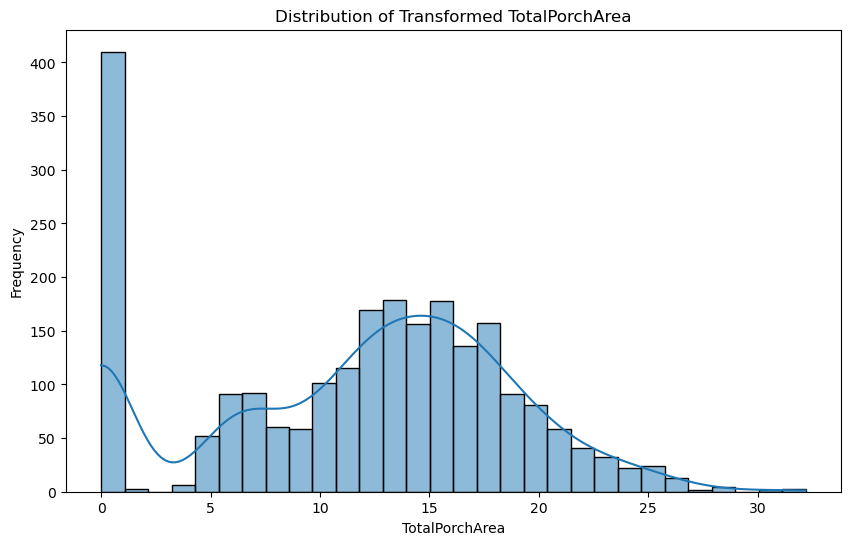

Skewness of TotalPorchArea after transformation: -0.2738378646545169


In [57]:
training['TotalPorchArea']=np.sqrt(training['TotalPorchArea'])
validation['TotalPorchArea']=np.sqrt(validation['TotalPorchArea'])
test_data['TotalPorchArea']=np.sqrt(test_data['TotalPorchArea'])
plt.figure(figsize=(10, 6))
sns.histplot(training['TotalPorchArea'], kde=True, bins=30)
plt.title(f'Distribution of Transformed TotalPorchArea')
plt.xlabel('TotalPorchArea')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['TotalPorchArea'].dropna())  # dropna() to ignore missing values
print(f'Skewness of TotalPorchArea after transformation: {feature_skewness}')

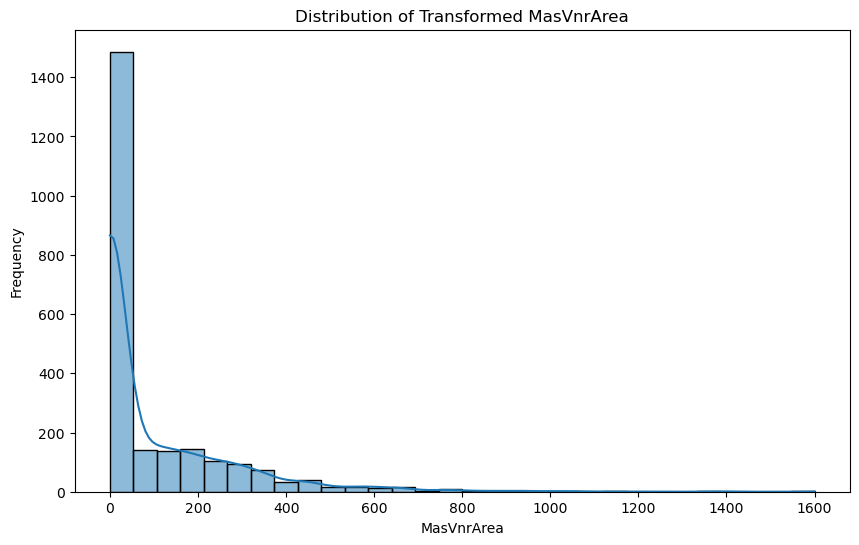

Skewness of MasVnrArea after transformation: 2.618735348136315


In [58]:
#training['MasVnrArea']=np.log1p(training['MasVnrArea'])
#validation['MasVnrArea']=np.log1p(validation['MasVnrArea'])
#test_data['MasVnrArea']=np.log1p(test_data['MasVnrArea'])
plt.figure(figsize=(10, 6))
sns.histplot(training['MasVnrArea'], kde=True, bins=30)
plt.title(f'Distribution of Transformed MasVnrArea')
plt.xlabel('MasVnrArea')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['MasVnrArea'].dropna())  # dropna() to ignore missing values
print(f'Skewness of MasVnrArea after transformation: {feature_skewness}')

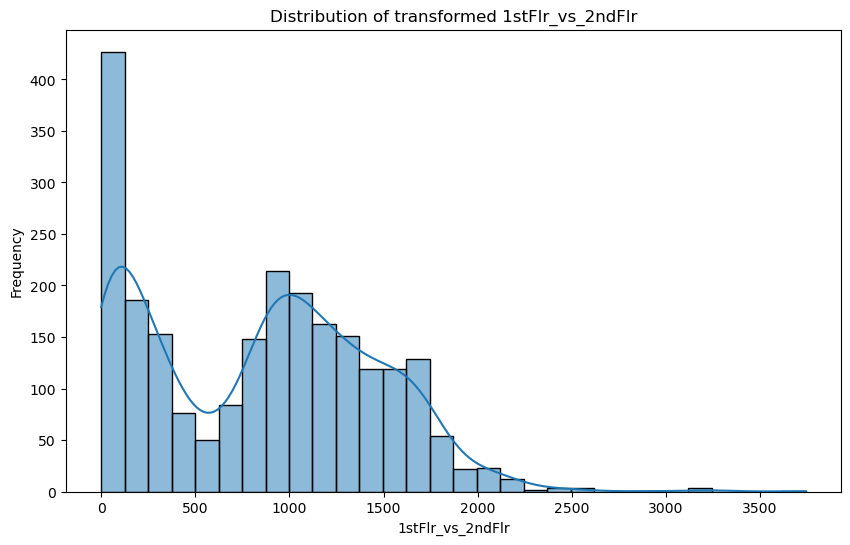

Skewness of 1stFlr_vs_2ndFlr after transformation: 0.25704972408270926


In [59]:
training['1stFlr_vs_2ndFlr'] = np.sqrt(np.power(training['1stFlr_vs_2ndFlr'],2))
validation['1stFlr_vs_2ndFlr'] = np.sqrt(np.power(validation['1stFlr_vs_2ndFlr'],2))
test_data['1stFlr_vs_2ndFlr'] = np.sqrt(np.power(test_data['1stFlr_vs_2ndFlr'],2))
plt.figure(figsize=(10, 6))
sns.histplot(training['1stFlr_vs_2ndFlr'], kde=True, bins=30)
plt.title(f'Distribution of transformed 1stFlr_vs_2ndFlr')
plt.xlabel('1stFlr_vs_2ndFlr')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['1stFlr_vs_2ndFlr'].dropna())  # dropna() to ignore missing values
print(f'Skewness of 1stFlr_vs_2ndFlr after transformation: {feature_skewness}')

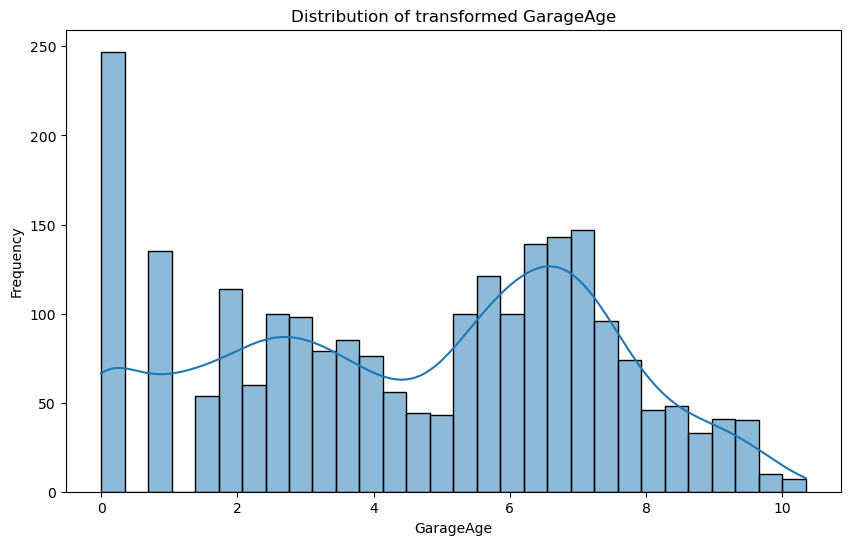

Skewness of GarageAge after transformation: -0.13163238906982525


In [60]:
training['GarageAge']=np.sqrt(training['GarageAge'])
validation['GarageAge']=np.sqrt(validation['GarageAge'])
test_data['GarageAge']=np.sqrt(test_data['GarageAge'])
plt.figure(figsize=(10, 6))
sns.histplot(training['GarageAge'], kde=True, bins=30)
plt.title(f'Distribution of transformed GarageAge')
plt.xlabel('GarageAge')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['GarageAge'].dropna())  # dropna() to ignore missing values
print(f'Skewness of GarageAge after transformation: {feature_skewness}')

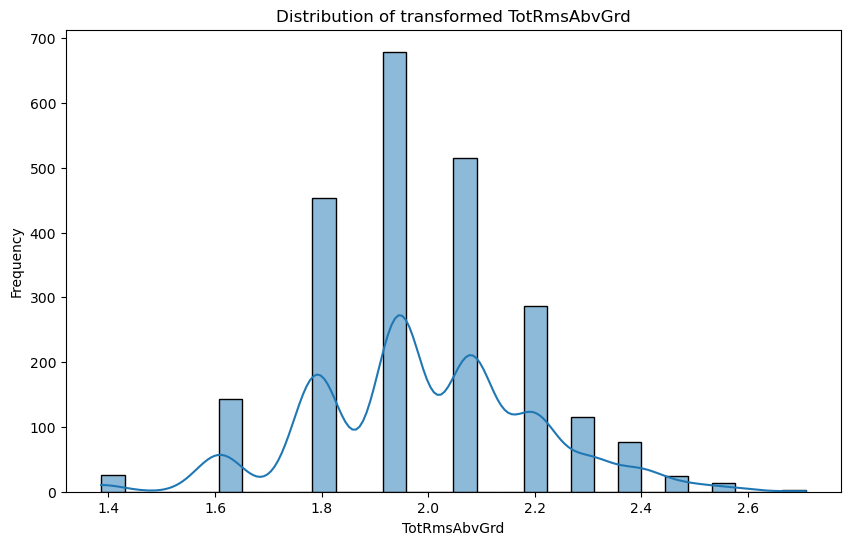

Skewness of TotRmsAbvGrd after transformation: 0.009381245621752006


In [61]:
training['TotRmsAbvGrd']=np.log1p(training['TotRmsAbvGrd'])
validation['TotRmsAbvGrd']=np.log1p(validation['TotRmsAbvGrd'])
test_data['TotRmsAbvGrd']=np.log1p(test_data['TotRmsAbvGrd'])
plt.figure(figsize=(10, 6))
sns.histplot(training['TotRmsAbvGrd'], kde=True, bins=30)
plt.title(f'Distribution of transformed TotRmsAbvGrd')
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['TotRmsAbvGrd'].dropna())  # dropna() to ignore missing values
print(f'Skewness of TotRmsAbvGrd after transformation: {feature_skewness}')

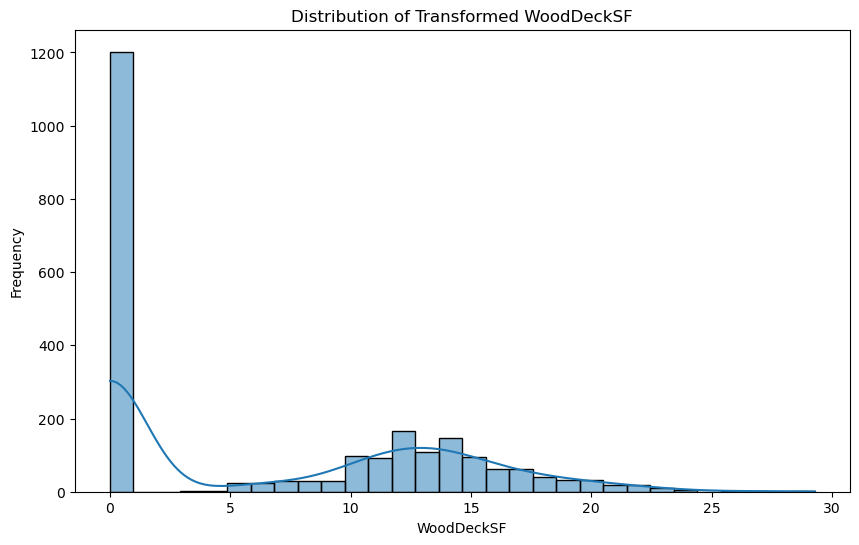

Skewness of WoodDeckSF after transformation: 0.4782125518066819


In [62]:
training['WoodDeckSF']=np.sqrt(training['WoodDeckSF'])
validation['WoodDeckSF']=np.sqrt(validation['WoodDeckSF'])
test_data['WoodDeckSF']=np.sqrt(test_data['WoodDeckSF'])
plt.figure(figsize=(10, 6))
sns.histplot(training['WoodDeckSF'], kde=True, bins=30)
plt.title(f'Distribution of Transformed WoodDeckSF')
plt.xlabel('WoodDeckSF')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['WoodDeckSF'].dropna())  # dropna() to ignore missing values
print(f'Skewness of WoodDeckSF after transformation: {feature_skewness}')

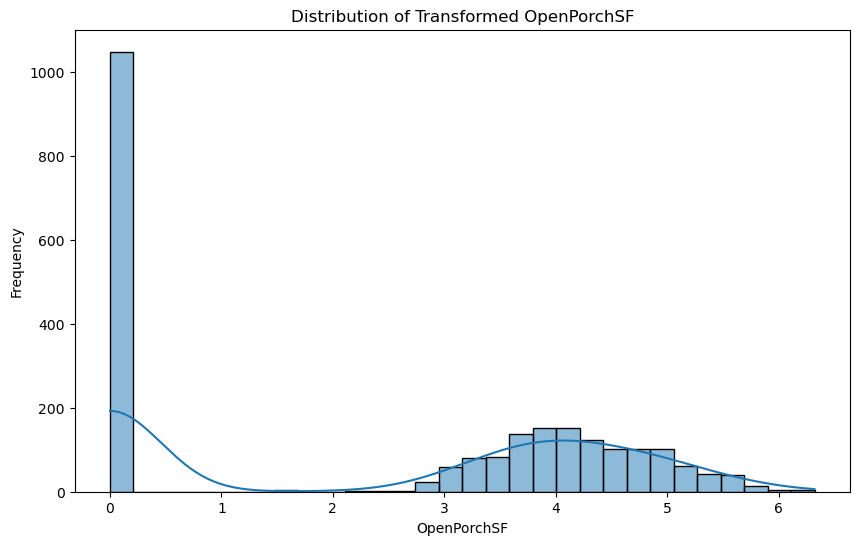

Skewness of OpenPorchSF after transformation: -0.01997142275742258


In [63]:
training['OpenPorchSF']=np.log1p(training['OpenPorchSF'])
validation['OpenPorchSF']=np.log1p(validation['OpenPorchSF'])
test_data['OpenPorchSF']=np.log1p(test_data['OpenPorchSF'])
plt.figure(figsize=(10, 6))
sns.histplot(training['OpenPorchSF'], kde=True, bins=30)
plt.title(f'Distribution of Transformed OpenPorchSF')
plt.xlabel('OpenPorchSF')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['OpenPorchSF'].dropna())  # dropna() to ignore missing values
print(f'Skewness of OpenPorchSF after transformation: {feature_skewness}')

#### Features to transform via transformer functions

In [64]:
from sklearn.preprocessing import PowerTransformer
yj_scaler = PowerTransformer(method='yeo-johnson', standardize=True)
yj_feat=['BsmtFinSF1','BsmtUnfSF','remodel_time','HomeAgeAtSale','GrLivArea','MasVnrArea']
training[yj_feat] = yj_scaler.fit_transform(training[yj_feat])
validation[yj_feat] = yj_scaler.transform(validation[yj_feat])
test_data[yj_feat] = yj_scaler.transform(test_data[yj_feat])

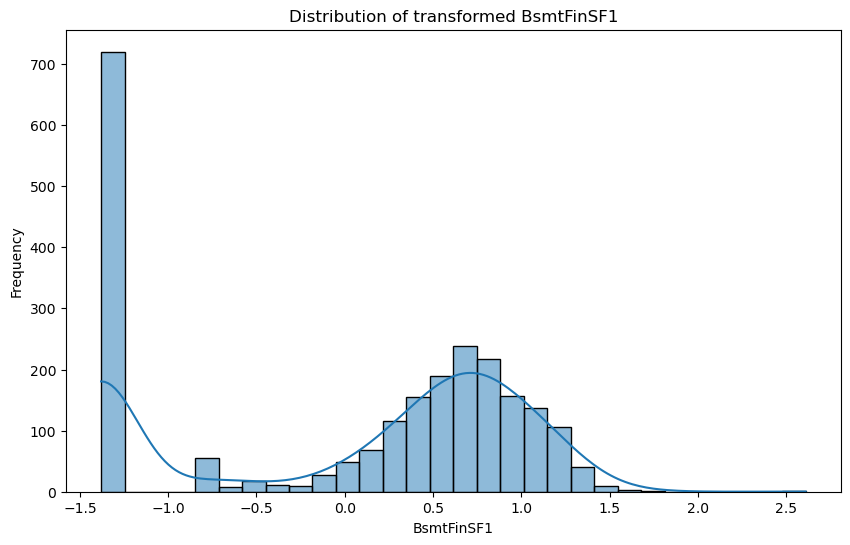

Skewness of BsmtFinSF1 after transforming: -0.4374428237289272


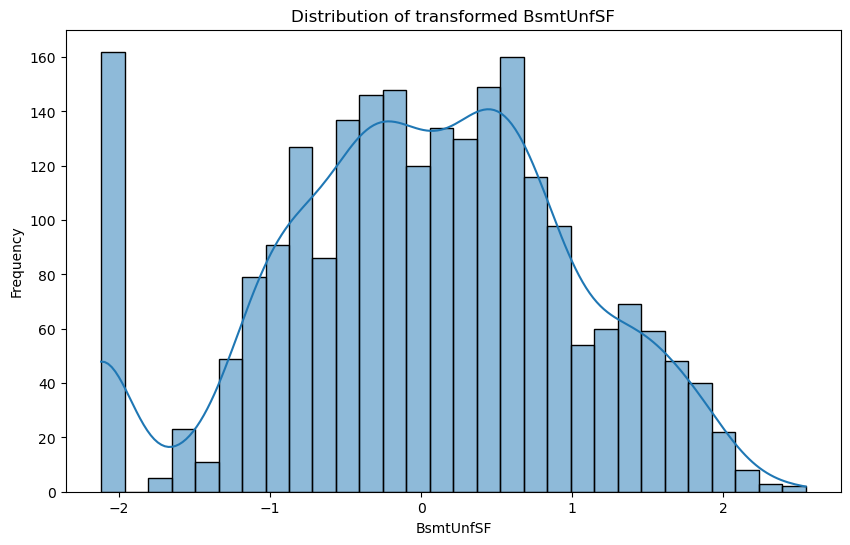

Skewness of BsmtUnfSF after transforming: -0.230034341777799


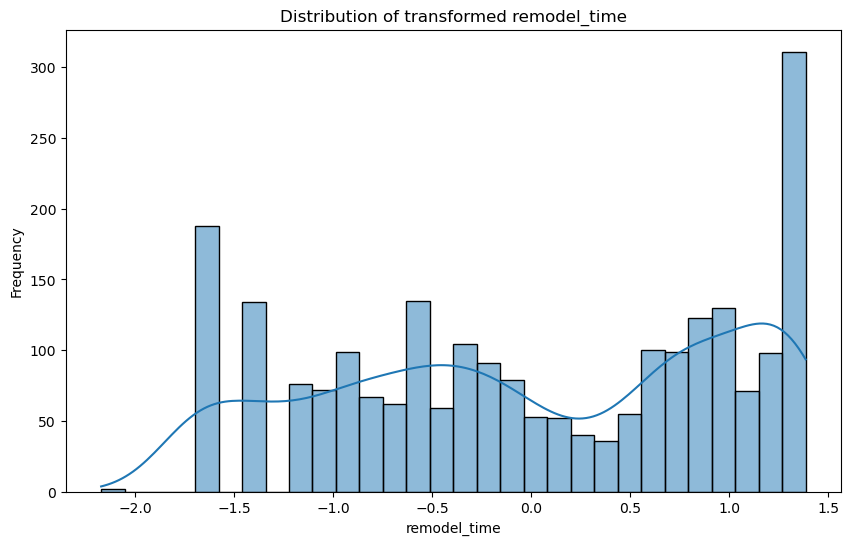

Skewness of remodel_time after transforming: -0.1773863849345182


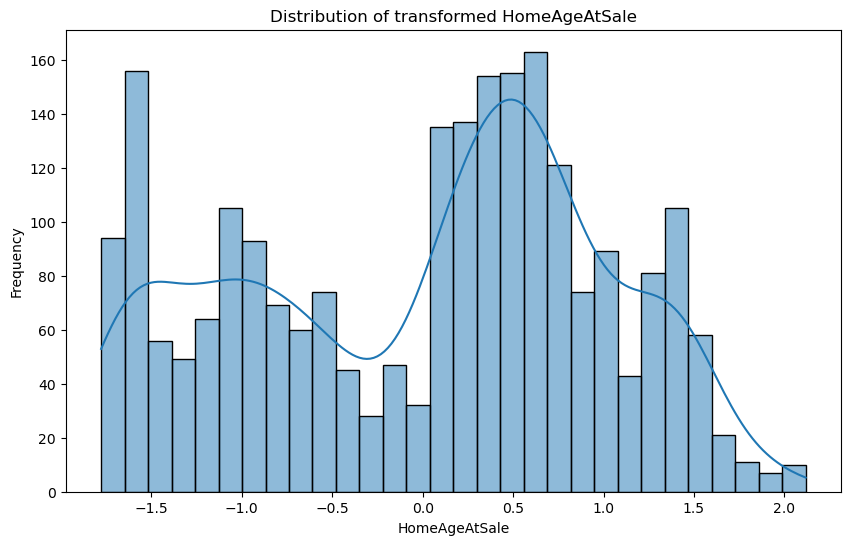

Skewness of HomeAgeAtSale after transforming: -0.22226309272604627


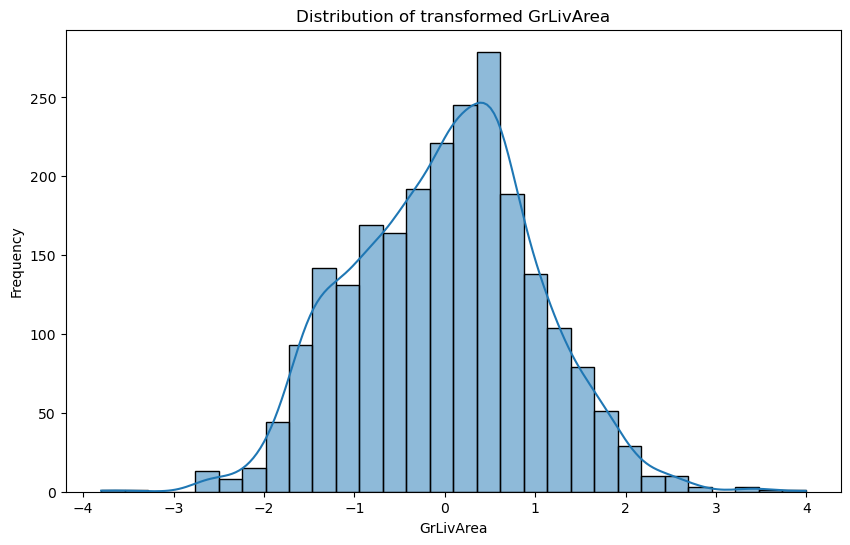

Skewness of GrLivArea after transforming: 0.0006126186486461369


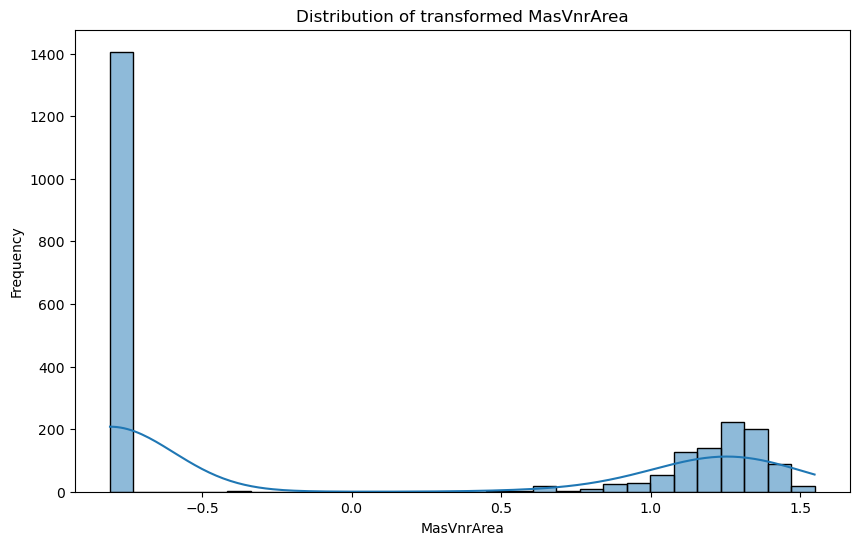

Skewness of MasVnrArea after transforming: 0.4501414712848246


In [65]:
for item in yj_feat:
     plt.figure(figsize=(10, 6))
     sns.histplot(training[item], kde=True, bins=30)
     plt.title(f'Distribution of transformed {item}')
     plt.xlabel(item)
     plt.ylabel('Frequency')
     plt.show()
     feature_skewness = skew(training[item].dropna())
     print(f'Skewness of {item} after transforming: {feature_skewness}')

In [66]:
training.to_csv('training_reengineered.csv')

In [67]:
from eda_best_features import get_cat_feat,select_best_continuous_features
nc=['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical','GarageType','MiscFeature','MoSold','SaleType','SaleCondition']
nc_derived=['has_garage','has_bsmt','Remodeled','Vintage','LuxuryCount','HasOutdoorSpace','has_EnclosedPorch','has_3SsnPorch','has_ScreenPorch']
nc_full=nc+nc_derived
oc=['OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']
oc_derived=['ExteriorScore','Interior_Finish_Score']
oc_full=oc+oc_derived
num_feat=['LotFrontage','LotArea','YearBuilt', 'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageYrBlt','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YrSold']
num_feat_derived=['HomeAgeAtSale','GarageAge','TotalPorchArea','Total_Bathrooms','remodel_time','1stFlr_vs_2ndFlr']
num_feat_full=num_feat+num_feat_derived
print(len(num_feat_full))
print(len(nc_full+oc_full+num_feat_full))
target=['SalePrice']
best_cat=get_cat_feat(training[nc_full+oc_full+['SalePrice']],nc_full+oc_full,'SalePrice',0.05)
best_cat

38
96
Skipping column 'Utilities' as it has 1 unique category(s).


['MSSubClass',
 'MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageType',
 'MoSold',
 'SaleType',
 'SaleCondition',
 'has_garage',
 'has_bsmt',
 'Remodeled',
 'Vintage',
 'LuxuryCount',
 'HasOutdoorSpace',
 'has_EnclosedPorch',
 'has_3SsnPorch',
 'has_ScreenPorch',
 'OverallQual',
 'OverallCond',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'ExteriorScore']

In [68]:
stat_df,best_num=select_best_continuous_features(training[num_feat_full+target],num_feat_full,'SalePrice')
best_num

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'YrSold',
 'HomeAgeAtSale',
 'GarageAge',
 'TotalPorchArea',
 'Total_Bathrooms',
 'remodel_time',
 '1stFlr_vs_2ndFlr']

In [69]:
stat_df

,Feature,Pearson Corr,Spearman Corr,Mutual Info
12,GrLivArea,0.718287,0.717358,1.078002
22,GarageCars,0.673434,0.679352,0.408680
35,Total_Bathrooms,0.663094,0.680359,0.476152
23,GarageArea,0.639787,0.622612,0.945555
9,1stFlrSF,0.594505,0.571012,0.904333
15,FullBath,0.589746,0.619675,0.301573
2,YearBuilt,0.576742,0.636136,0.973899
3,YearRemodAdd,0.568550,0.572121,0.804007
19,TotRmsAbvGrd,0.510560,0.503377,0.379523
25,OpenPorchSF,0.469818,0.481362,0.537257


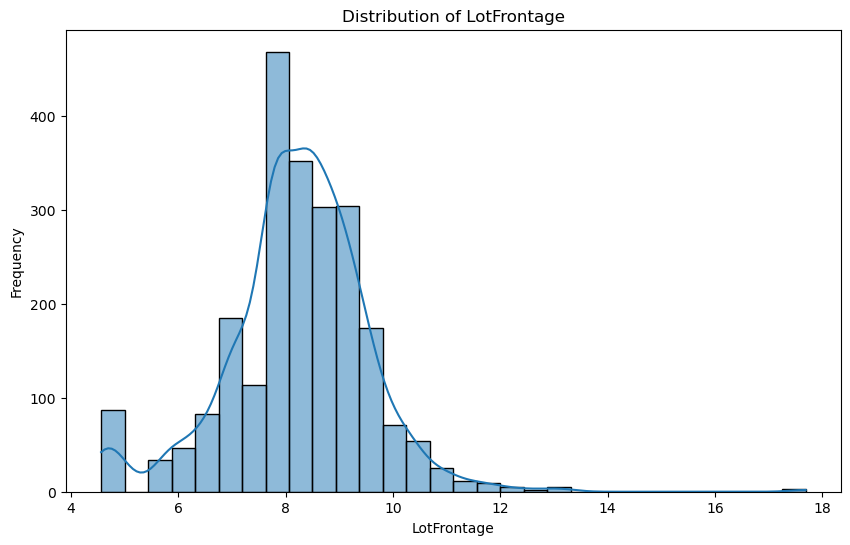

Skewness of LotFrontage: 0.13874992301324618


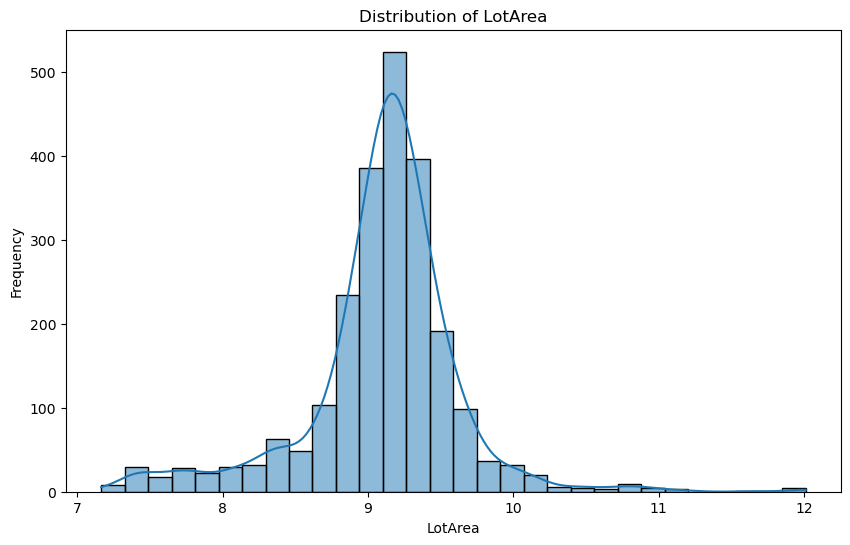

Skewness of LotArea: -0.38006320427953555


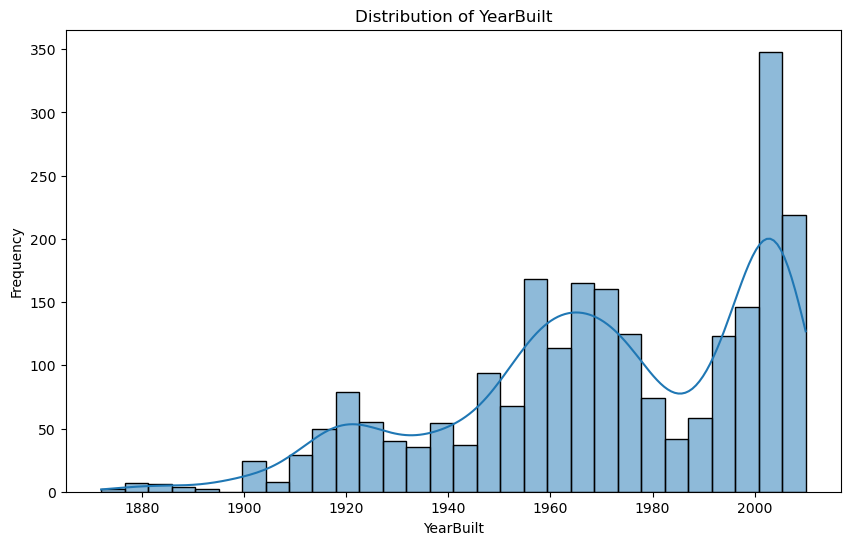

Skewness of YearBuilt: -0.6310777594501147


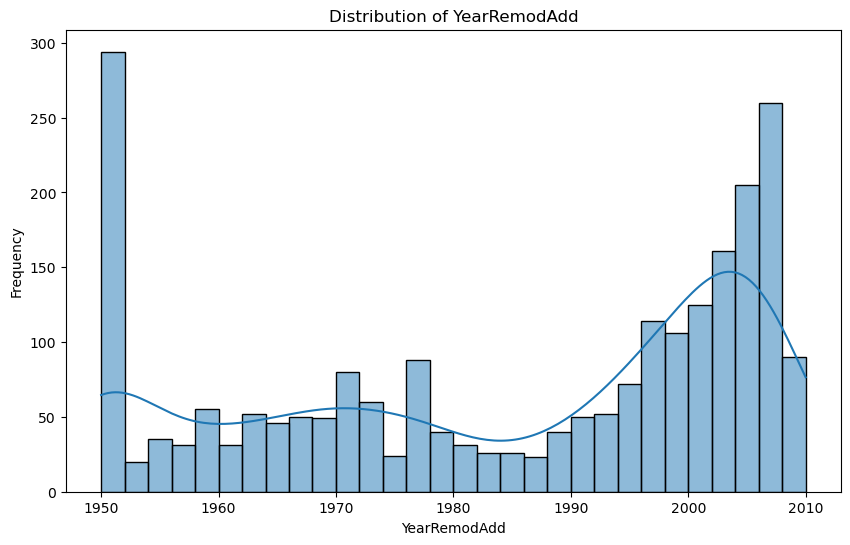

Skewness of YearRemodAdd: -0.45907598767014873


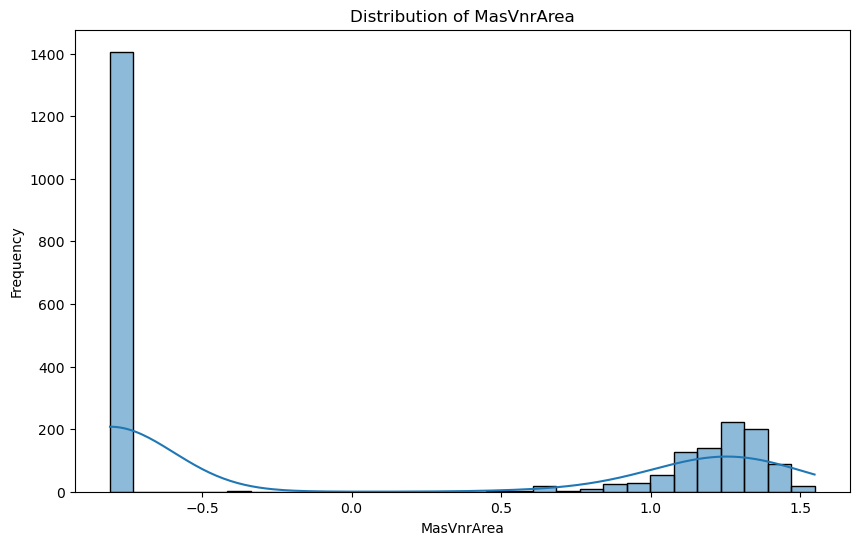

Skewness of MasVnrArea: 0.4501414712848246


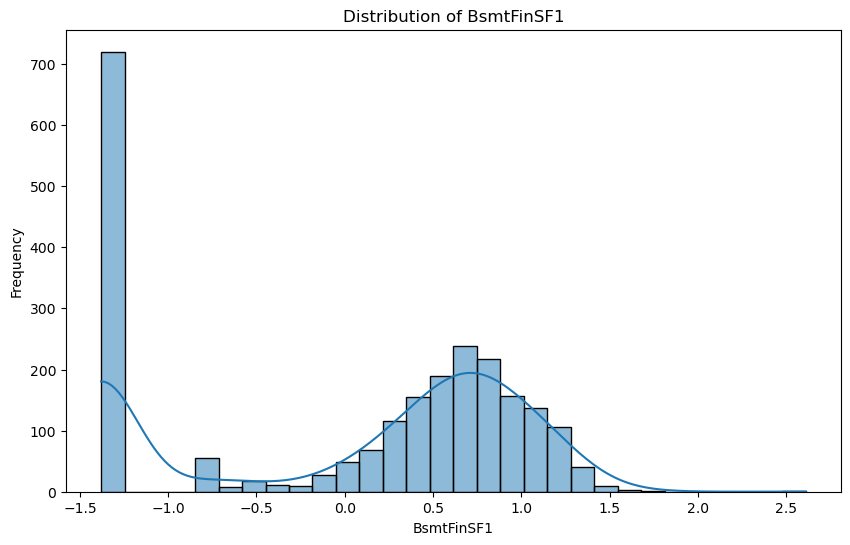

Skewness of BsmtFinSF1: -0.4374428237289272


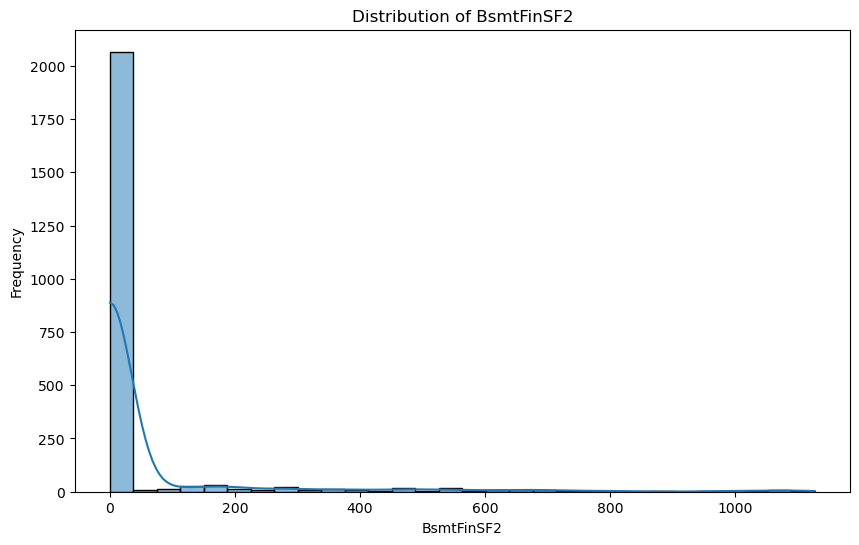

Skewness of BsmtFinSF2: 4.159089911766878


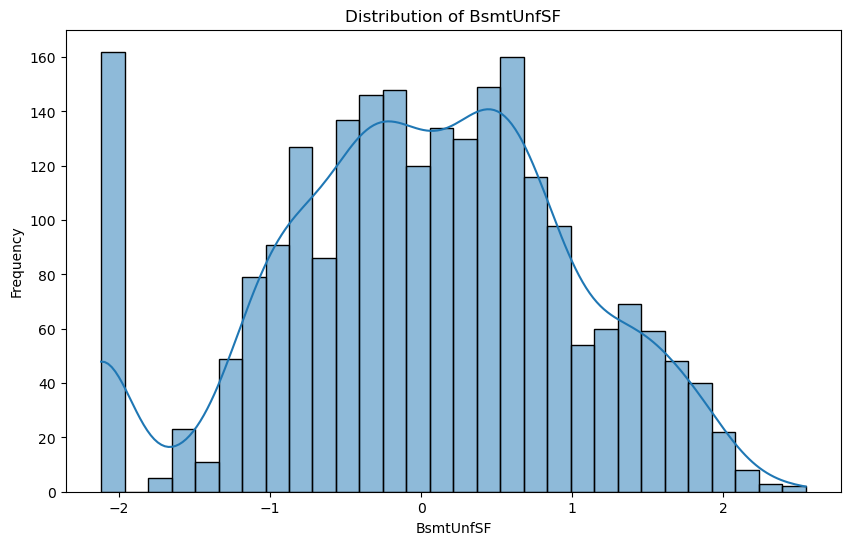

Skewness of BsmtUnfSF: -0.230034341777799


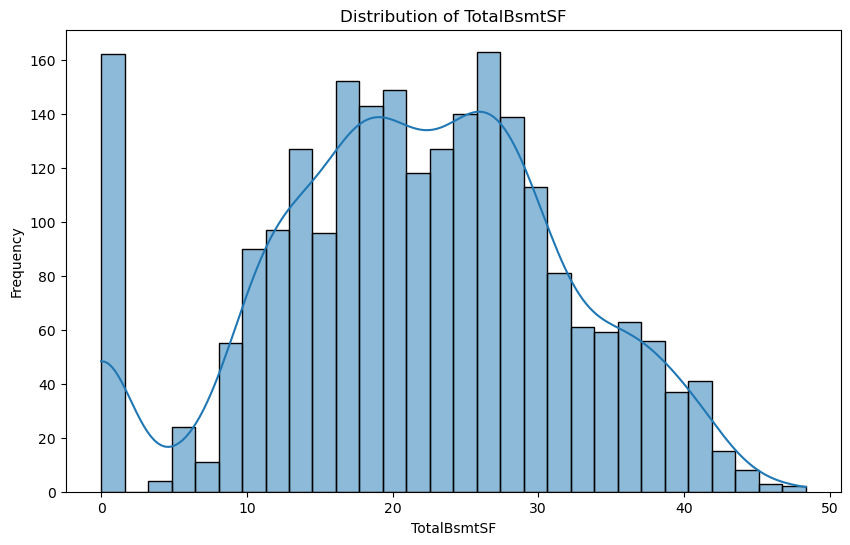

Skewness of TotalBsmtSF: -0.18015923612566717


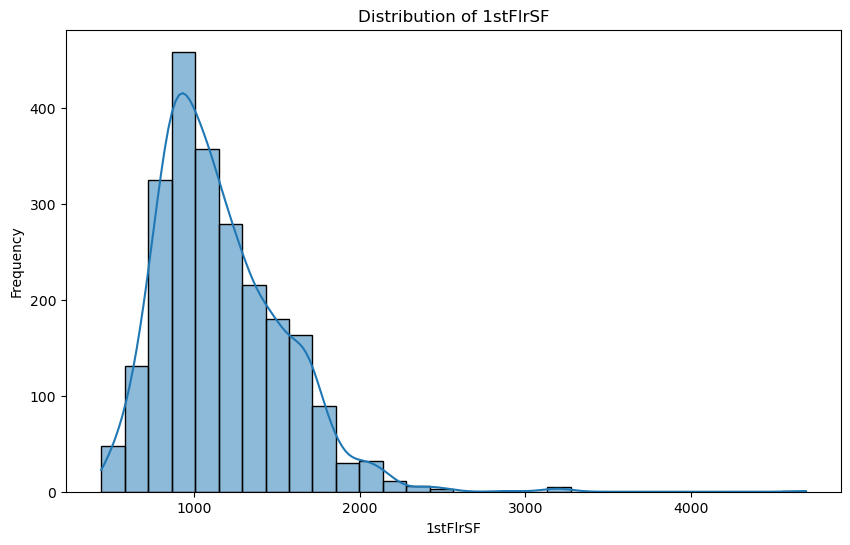

Skewness of 1stFlrSF: 1.2765200927059197


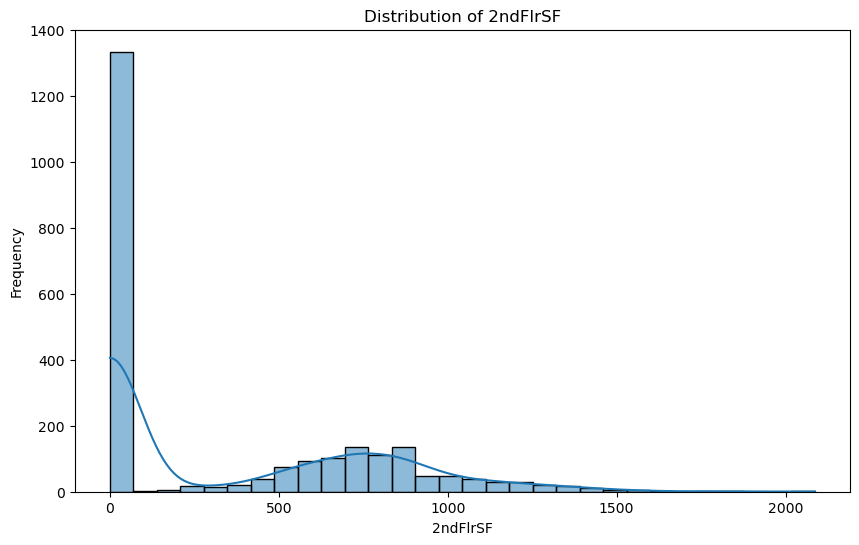

Skewness of 2ndFlrSF: 0.8293609938825114


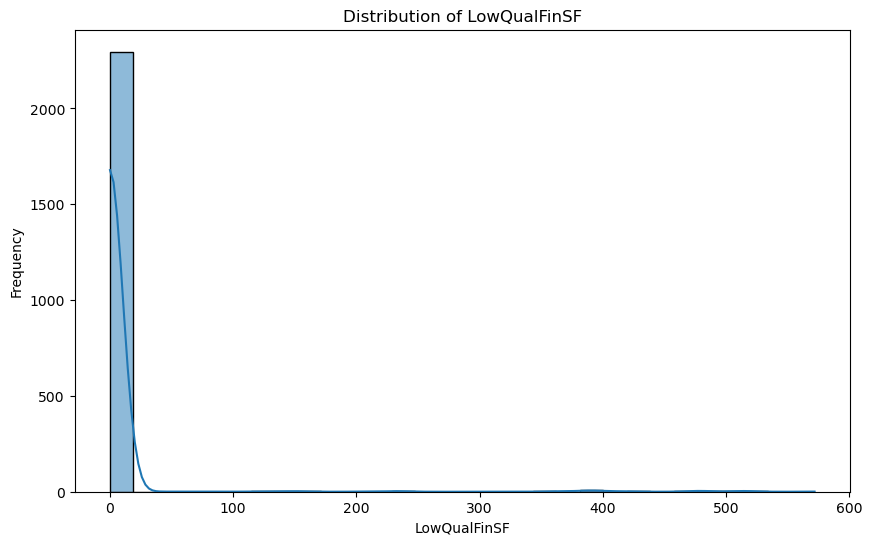

Skewness of LowQualFinSF: 8.701022241638022


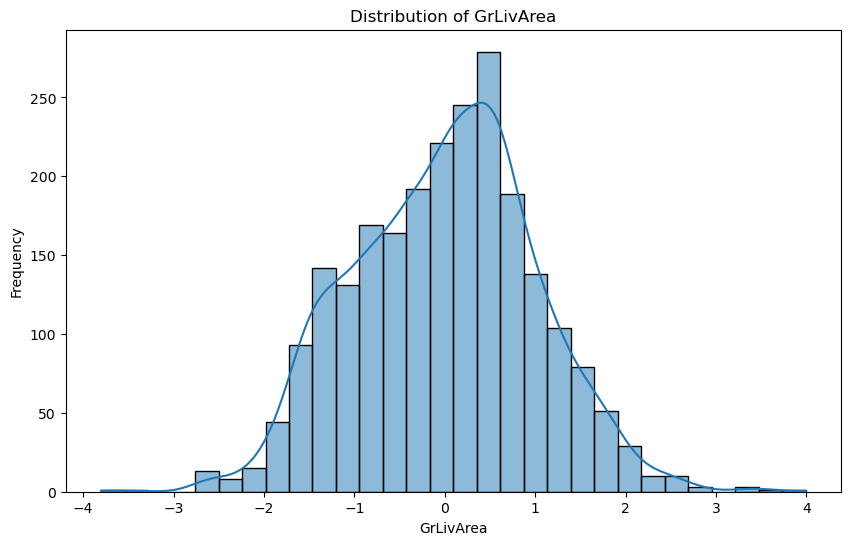

Skewness of GrLivArea: 0.0006126186486461369


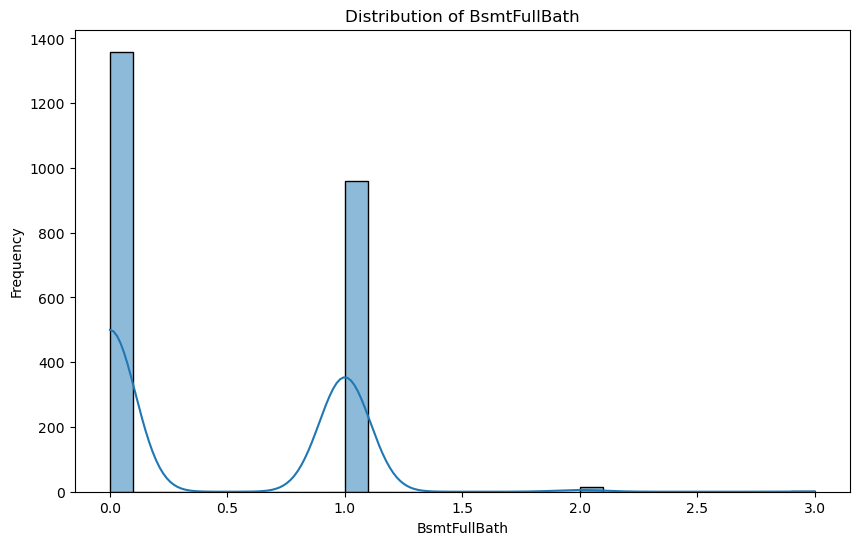

Skewness of BsmtFullBath: 0.5293515721622998


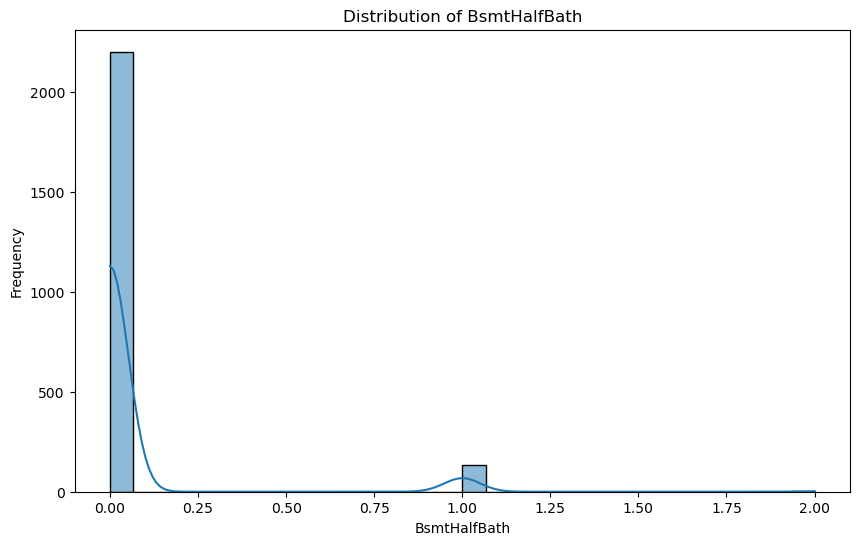

Skewness of BsmtHalfBath: 4.054968009086295


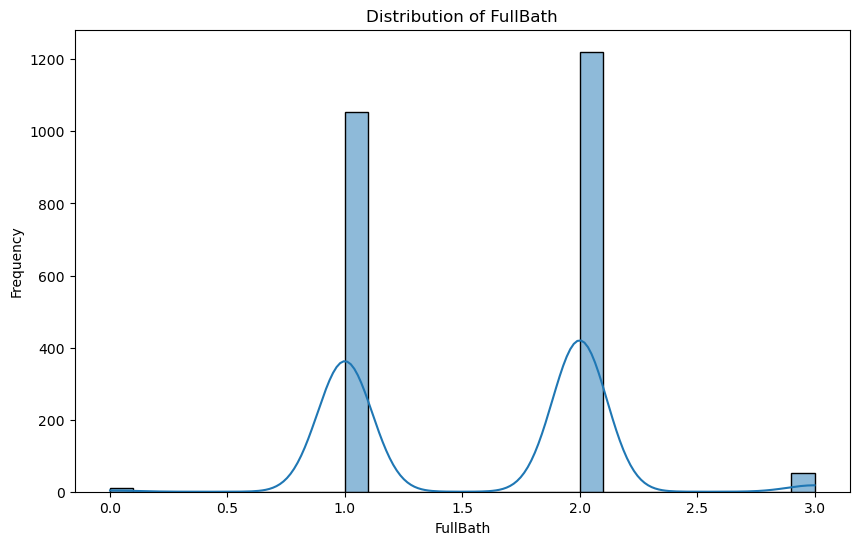

Skewness of FullBath: 0.07916822566299171


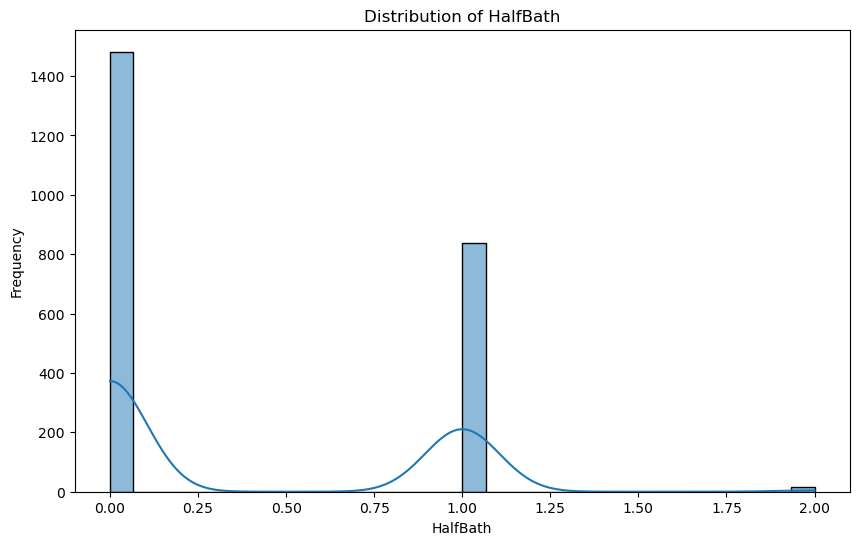

Skewness of HalfBath: 0.7015135214188006


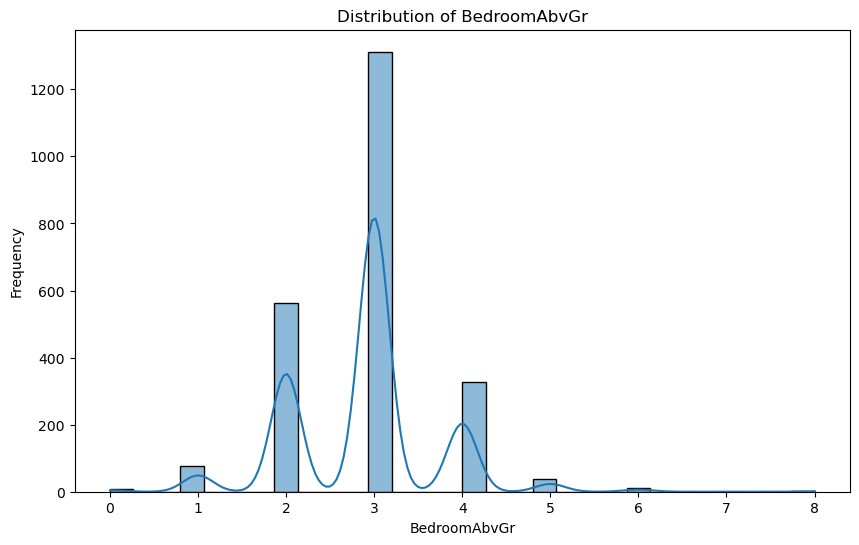

Skewness of BedroomAbvGr: 0.29146519816915584


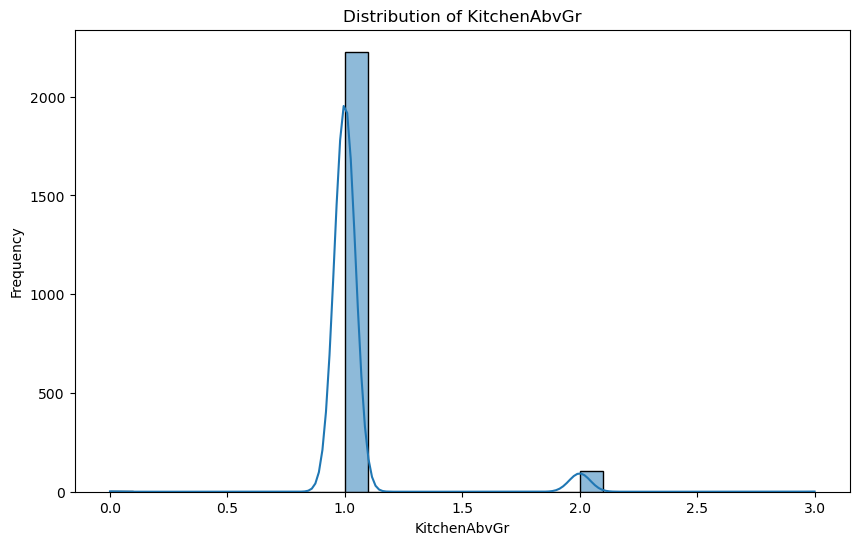

Skewness of KitchenAbvGr: 4.25488348271231


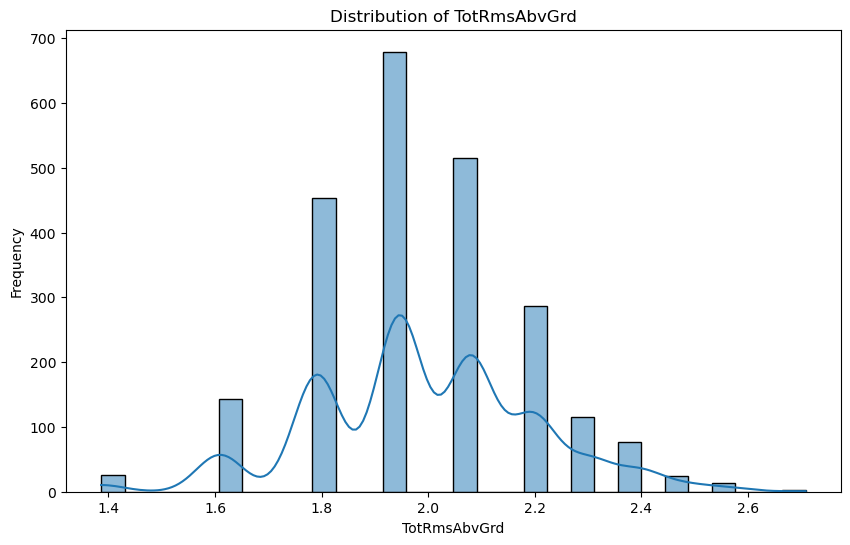

Skewness of TotRmsAbvGrd: 0.009381245621752006


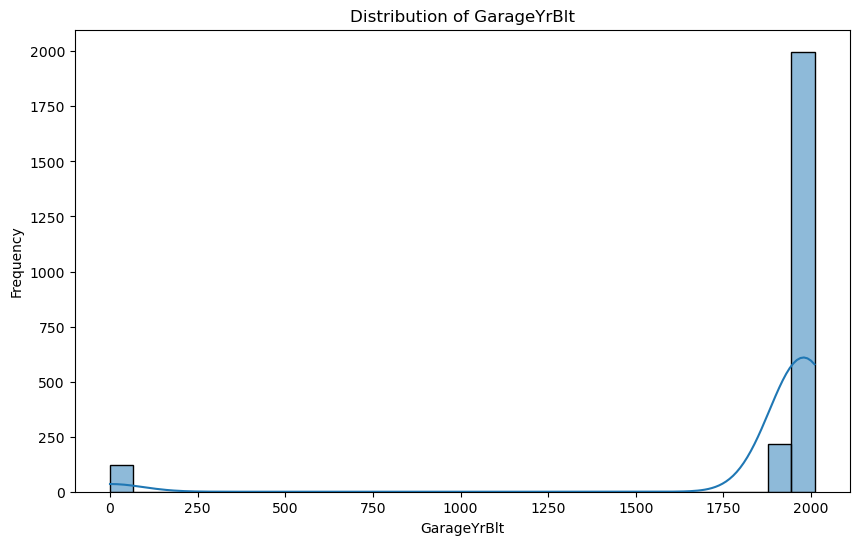

Skewness of GarageYrBlt: -3.986201657981357


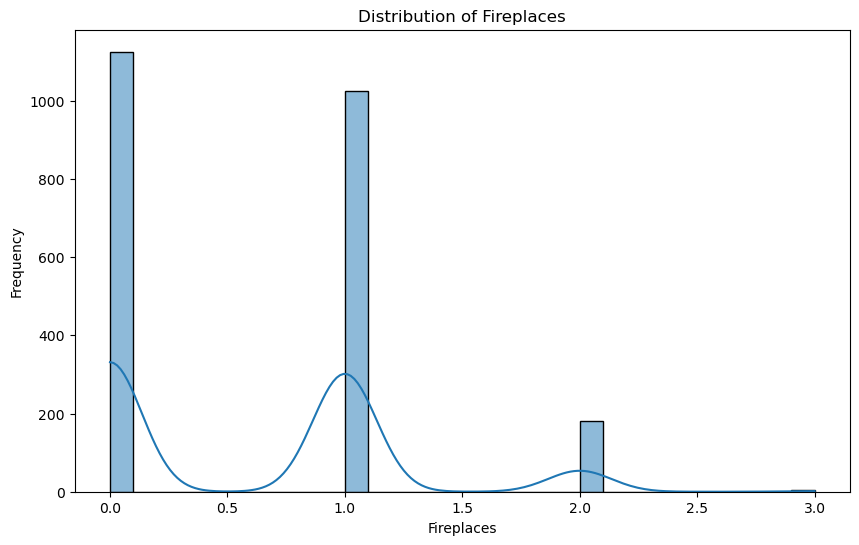

Skewness of Fireplaces: 0.6382733690192967


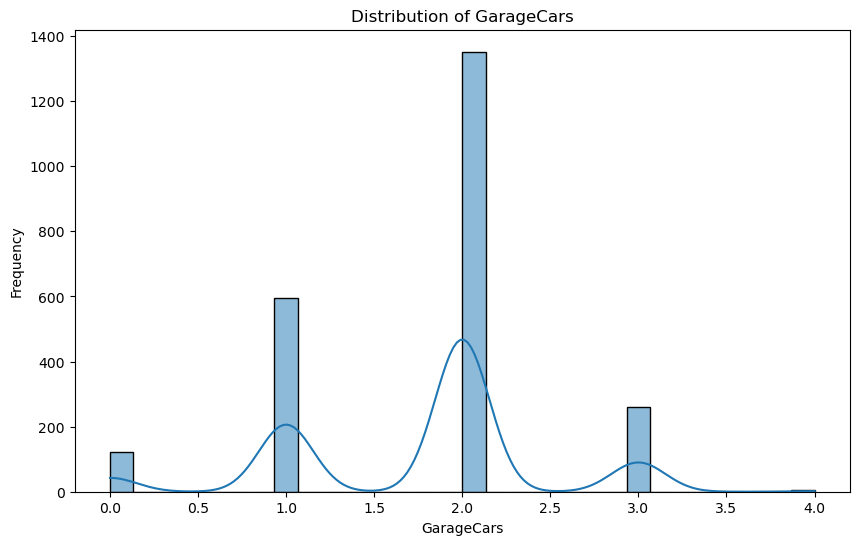

Skewness of GarageCars: -0.3860275313623527


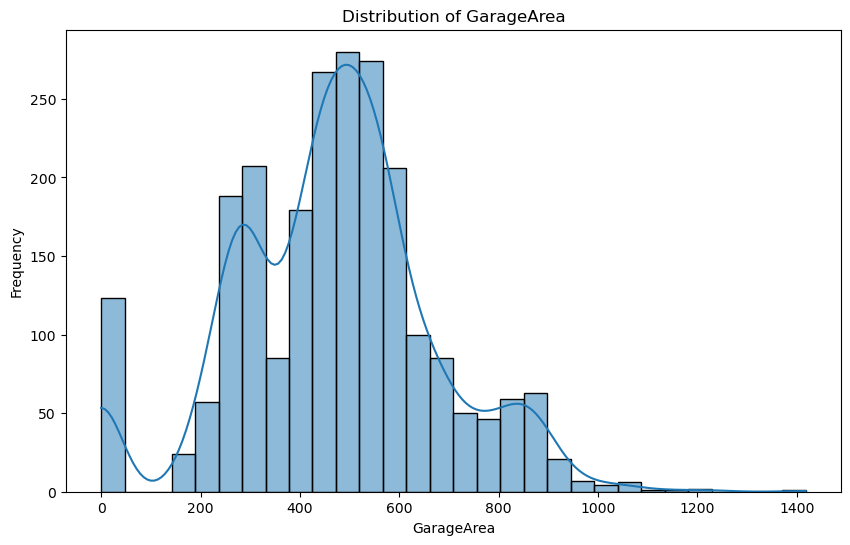

Skewness of GarageArea: 0.0411385299593741


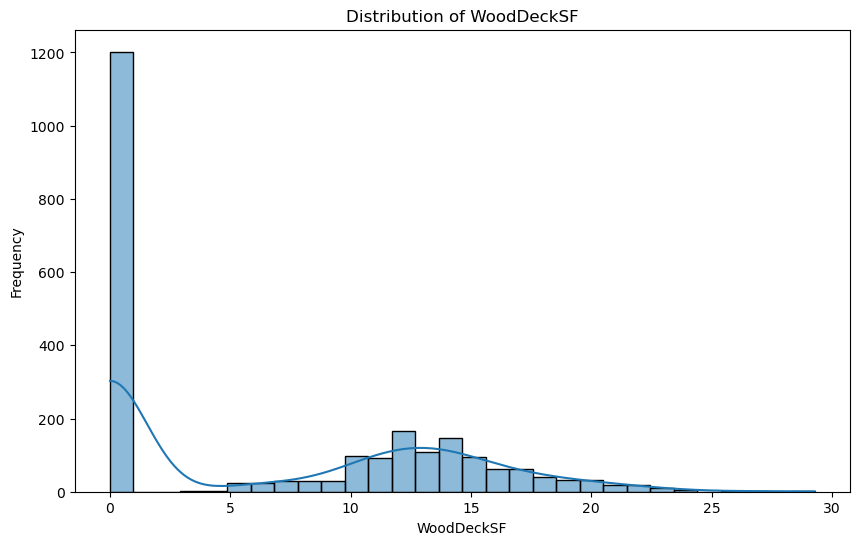

Skewness of WoodDeckSF: 0.4782125518066819


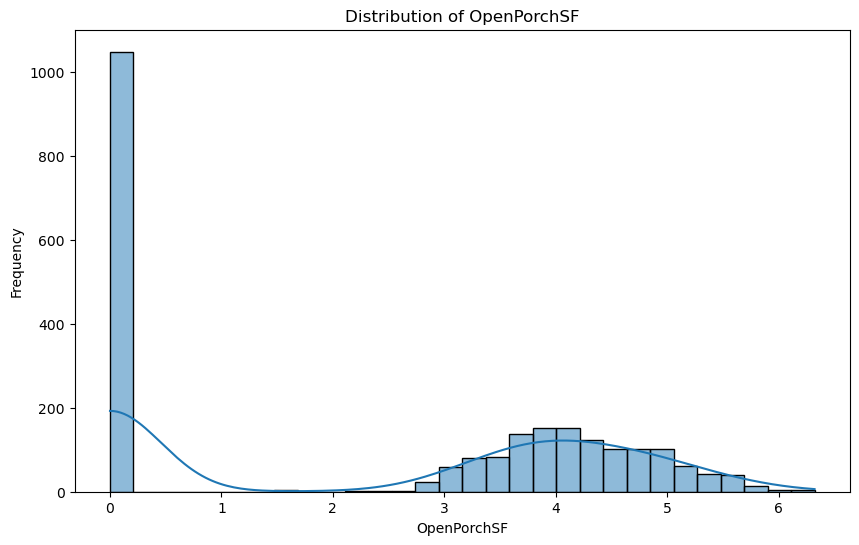

Skewness of OpenPorchSF: -0.01997142275742258


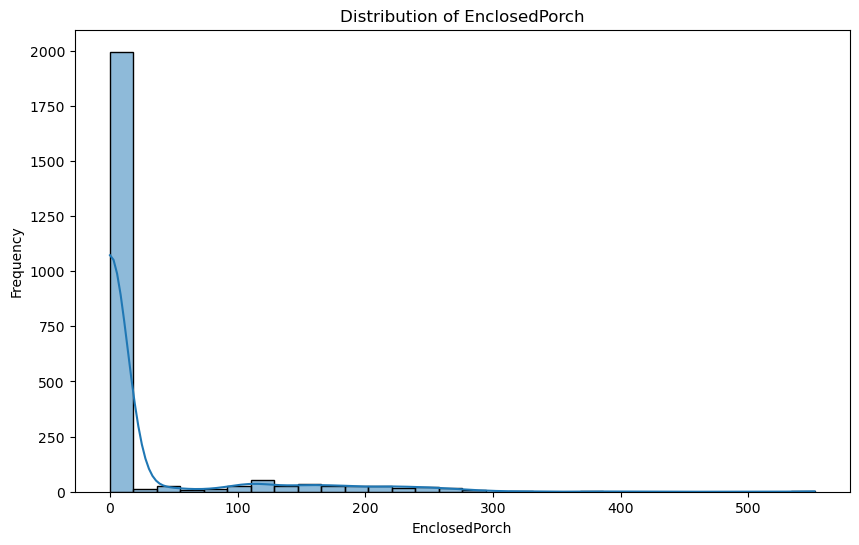

Skewness of EnclosedPorch: 3.1171726882059896


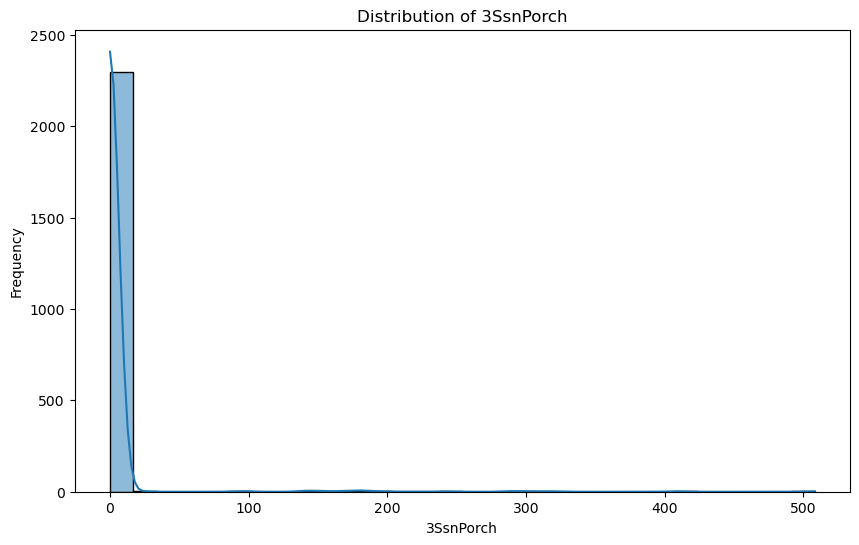

Skewness of 3SsnPorch: 10.610265629655721


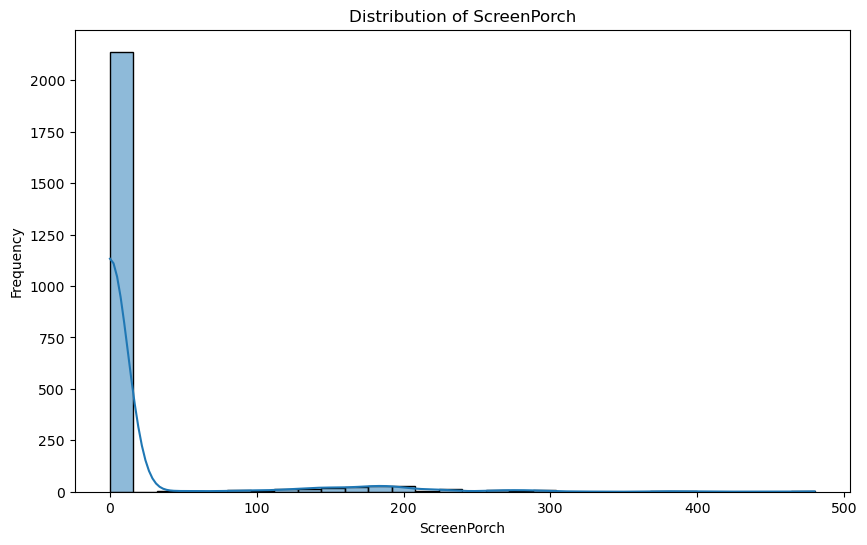

Skewness of ScreenPorch: 4.0196587326492805


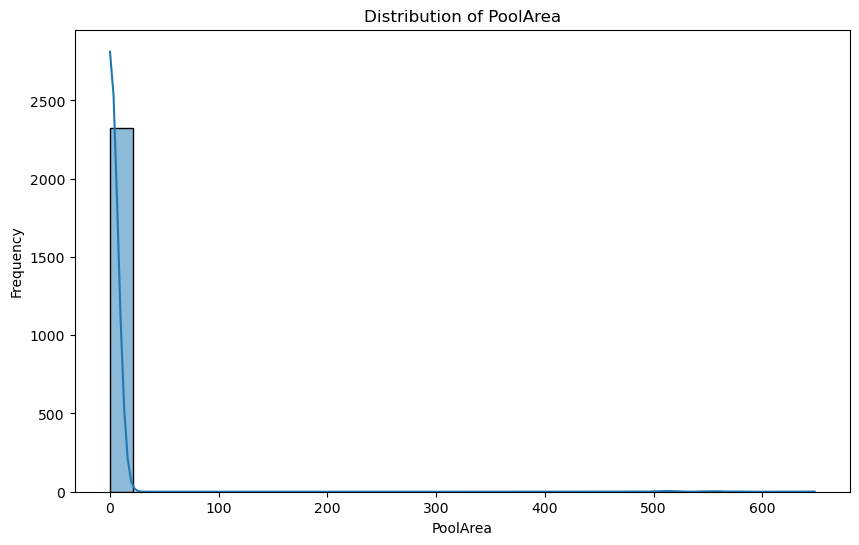

Skewness of PoolArea: 16.208559690957888


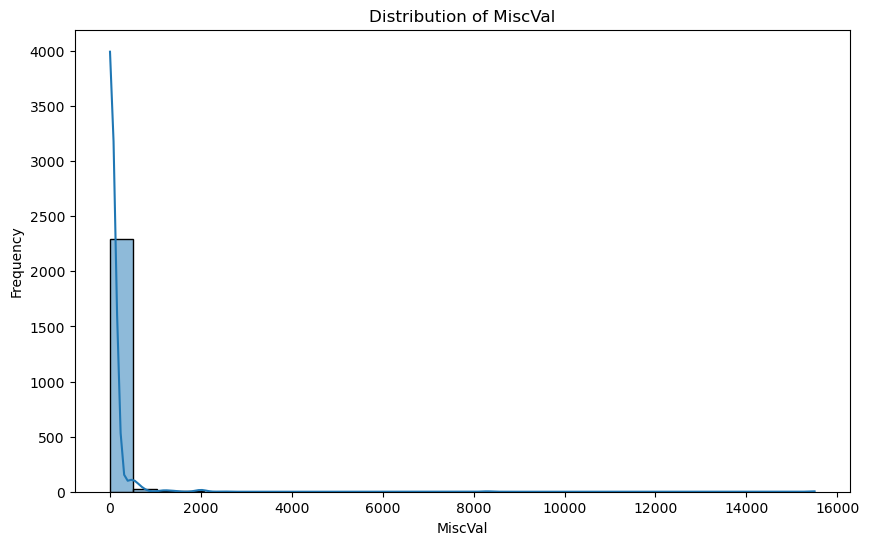

Skewness of MiscVal: 22.904842188162778


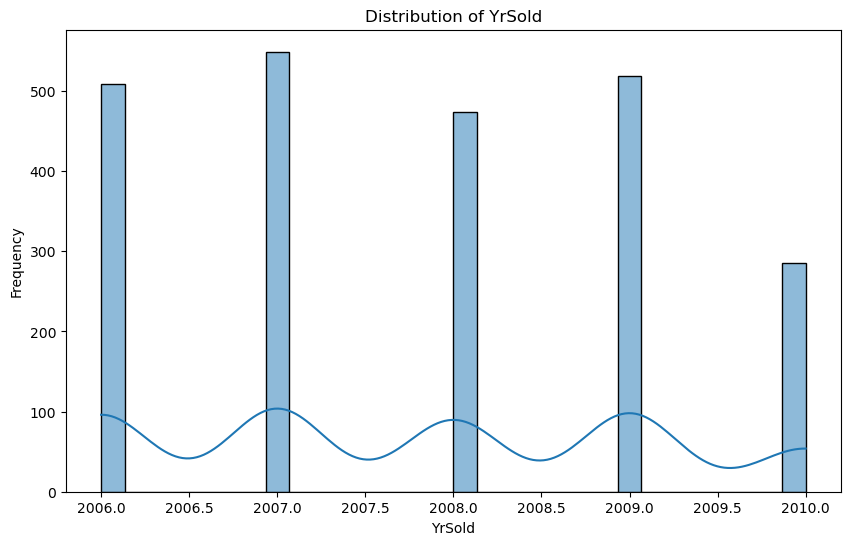

Skewness of YrSold: 0.13455162531254555


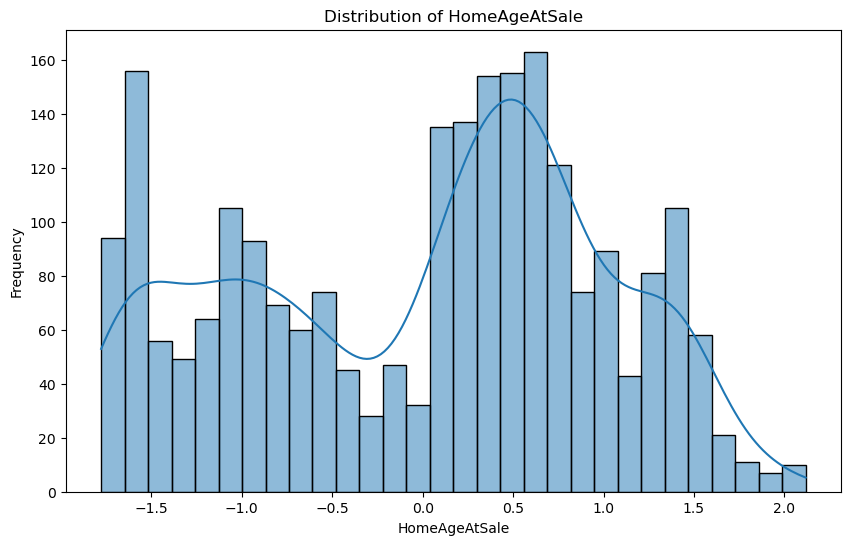

Skewness of HomeAgeAtSale: -0.22226309272604627


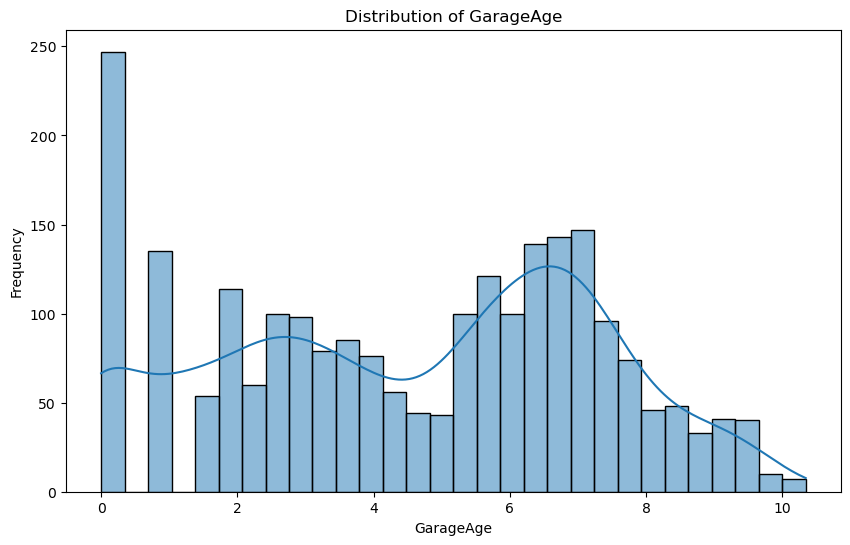

Skewness of GarageAge: -0.13163238906982525


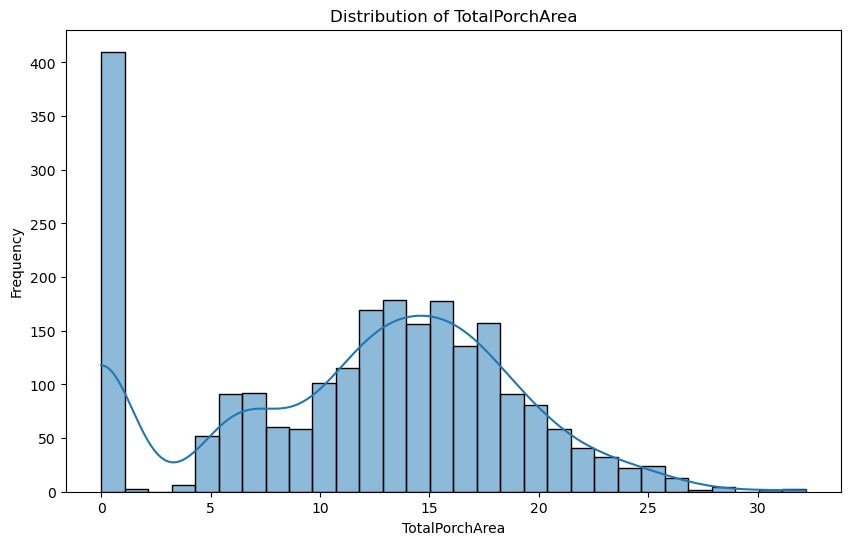

Skewness of TotalPorchArea: -0.2738378646545169


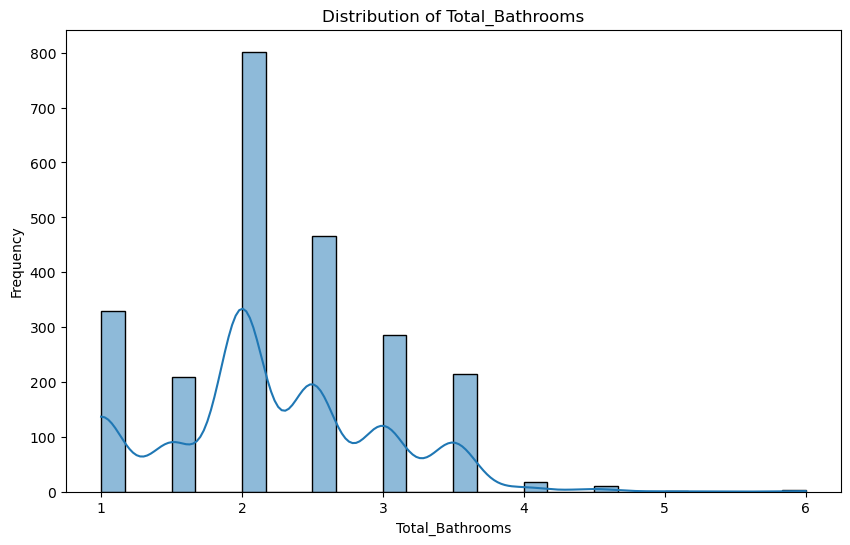

Skewness of Total_Bathrooms: 0.32372464837696996


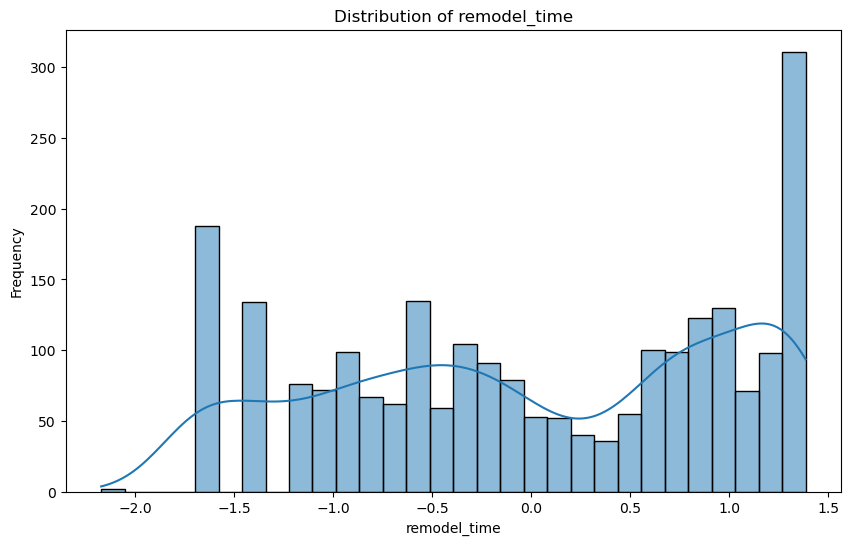

Skewness of remodel_time: -0.1773863849345182


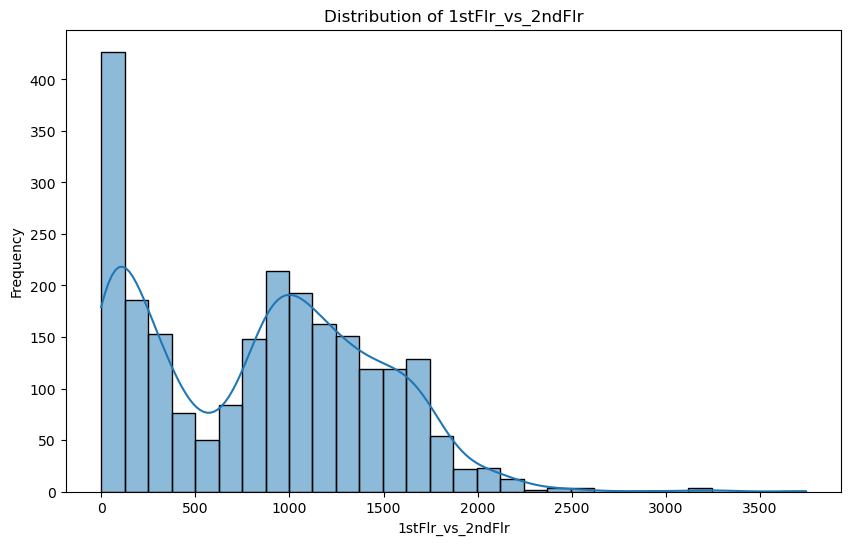

Skewness of 1stFlr_vs_2ndFlr: 0.25704972408270926


In [70]:
for item in num_feat_full:
    plt.figure(figsize=(10, 6))
    sns.histplot(training[item], kde=True, bins=30)
    plt.title(f'Distribution of {item}')
    plt.xlabel(item)
    plt.ylabel('Frequency')
    plt.show()
    feature_skewness = skew(training[item].dropna())
    print(f'Skewness of {item}: {feature_skewness}')

In [71]:
training=training.loc[:,training.columns.isin(best_num+best_cat+['SalePrice'])]
validation=validation.loc[:,validation.columns.isin(best_num+best_cat+['SalePrice'])]
test_data=test_data.loc[:,test_data.columns.isin(best_num+best_cat)]
validation

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,has_bsmt,Remodeled,Vintage,LuxuryCount,HasOutdoorSpace,has_EnclosedPorch,has_3SsnPorch,has_ScreenPorch,ExteriorScore,SalePrice
0,2-Story,Other,8.069214,9.005511,NA,Reg,Lvl,Standard,Somerst,Road Proximity,...,1,1,21st Century,0,1,0,0,0,7,0.623370
1,Multi/Split-Level,Residential Low Density,8.937798,9.560405,NA,Reg,Lvl,Standard,NWAmes,Road Proximity,...,1,0,20th Century,1,1,0,0,0,6,0.626270
2,1-Story,Residential Low Density,10.848932,9.520607,NA,Irreg,Lvl,Standard,CollgCr,Road Proximity,...,1,1,21st Century,2,1,0,0,0,7,0.716166
3,2-Story,Residential Low Density,8.475935,9.409683,NA,Irreg,Low,Standard,ClearCr,Road Proximity,...,1,1,20th Century,0,1,0,0,0,6,0.628609
4,1-Story,Residential Low Density,8.934469,9.768250,NA,Reg,Low,Standard,Mitchel,Road Proximity,...,1,0,20th Century,1,1,0,0,0,6,0.475842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,2-Story,Residential Low Density,8.597163,9.220683,NA,Irreg,Lvl,Standard,Gilbert,Road Proximity,...,1,0,20th Century,1,1,0,0,1,6,0.616774
580,Duplex/Multi-Family,Residential Low Density,9.056536,9.314359,NA,Reg,Lvl,Standard,Mitchel,Road Proximity,...,1,1,20th Century,2,0,0,0,0,6,0.541109
581,2-Story,Residential Low Density,8.878468,9.238900,NA,Irreg,Lvl,Standard,NoRidge,Road Proximity,...,1,1,20th Century,2,1,0,0,0,7,0.974509
582,Duplex/Multi-Family,Residential Low Density,7.745967,9.053102,NA,Reg,Lvl,Standard,NAmes,Road Proximity,...,0,0,20th Century,0,0,0,0,0,6,-0.073647


In [72]:
from eda_preprocesser import feature_encoder
mod_encoder=feature_encoder()
training=mod_encoder.fit_transform(training)
validation=mod_encoder.transform(validation)
test_data=mod_encoder.transform(test_data)

In [73]:
training

,MSSubClass_1.5-Story,MSSubClass_2-Story,MSSubClass_Duplex/Multi-Family,MSSubClass_Multi/Split-Level,MSZoning_Residential Low Density,MSZoning_Residential Medium Density,LotFrontage,LotArea,Alley_NA,Alley_Pave,...,Remodeled,Vintage_20th Century,Vintage_21st Century,LuxuryCount,HasOutdoorSpace,has_EnclosedPorch,has_3SsnPorch,has_ScreenPorch,ExteriorScore,SalePrice
0,0.0,0.0,0.0,0.0,1.0,0.0,7.295522,8.293661,1.0,0.0,...,0,0.0,1.0,2,1,0,0,0,7,0.976021
1,0.0,0.0,0.0,0.0,1.0,0.0,10.955539,9.235946,1.0,0.0,...,0,1.0,0.0,0,0,0,0,0,6,0.196752
2,0.0,1.0,0.0,0.0,1.0,0.0,8.944272,9.204222,1.0,0.0,...,1,1.0,0.0,1,1,0,0,0,7,0.858662
3,0.0,1.0,0.0,0.0,1.0,0.0,9.695360,9.238304,1.0,0.0,...,0,1.0,0.0,1,1,1,0,0,6,0.696039
4,0.0,0.0,0.0,0.0,1.0,0.0,8.529687,8.868438,1.0,0.0,...,0,1.0,0.0,0,0,0,0,0,6,0.262167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,0.0,0.0,0.0,0.0,1.0,0.0,7.454679,8.973720,1.0,0.0,...,0,1.0,0.0,1,1,0,0,0,6,-0.011338
2332,0.0,0.0,0.0,0.0,1.0,0.0,8.831761,9.139703,1.0,0.0,...,0,0.0,1.0,1,1,0,0,0,7,0.567765
2333,1.0,0.0,0.0,0.0,1.0,0.0,8.062258,8.962520,1.0,0.0,...,1,1.0,0.0,1,1,0,0,0,6,0.300105
2334,0.0,0.0,0.0,0.0,1.0,0.0,7.745967,9.008591,1.0,0.0,...,1,1.0,0.0,0,0,0,0,0,6,0.139762


### Scaling Continuous Features

In [74]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
s_scaler = StandardScaler()
stand_feat=['LotArea','LotFrontage','TotalPorchArea','TotalBsmtSF','remodel_time','1stFlr_vs_2ndFlr','WoodDeckSF','OpenPorchSF','TotRmsAbvGrd']
training[stand_feat] = s_scaler.fit_transform(training[stand_feat])
validation[stand_feat] = s_scaler.transform(validation[stand_feat])
test_data[stand_feat] = s_scaler.transform(test_data[stand_feat])

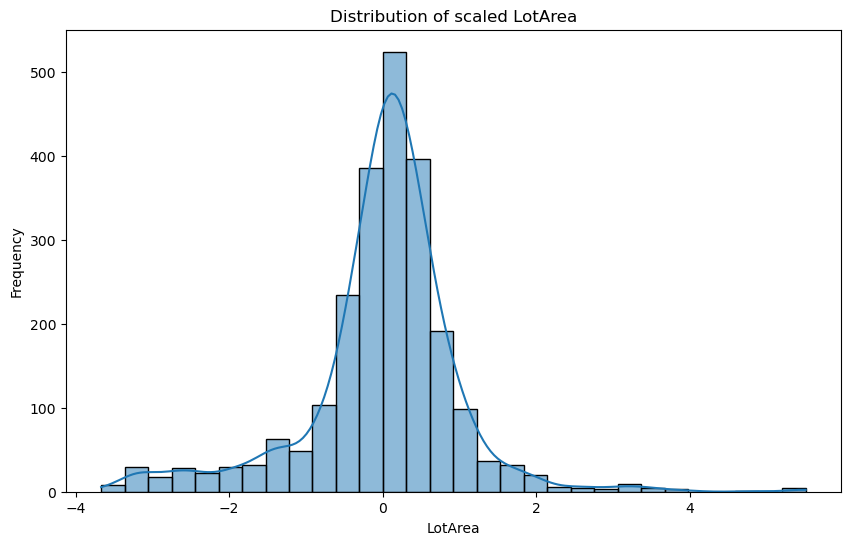

Skewness of LotArea after scaling: -0.3800632042795395
Kurtosis: 4.086089836373234
Shapiro-Wilk Test p-value: 1.364265661767634e-36
Data is not normally distributed.


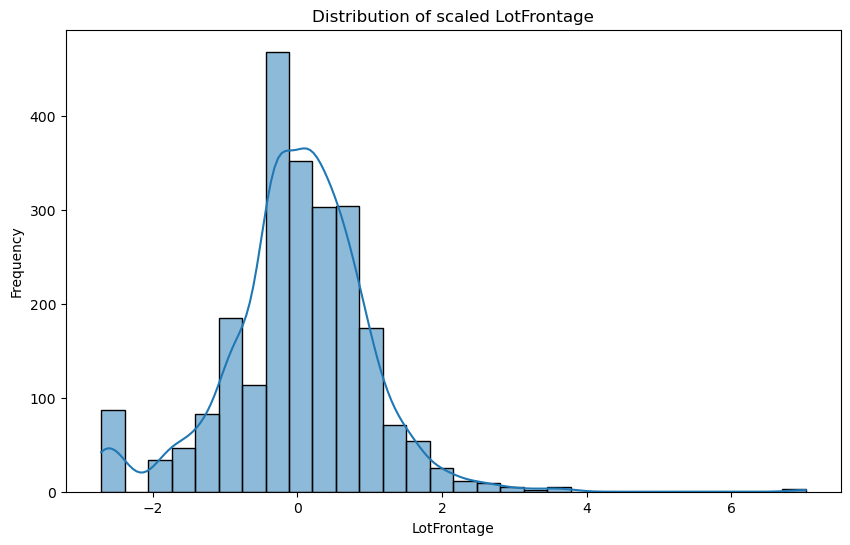

Skewness of LotFrontage after scaling: 0.13874992301324351
Kurtosis: 3.855339140261562
Shapiro-Wilk Test p-value: 5.762912049833187e-27
Data is not normally distributed.


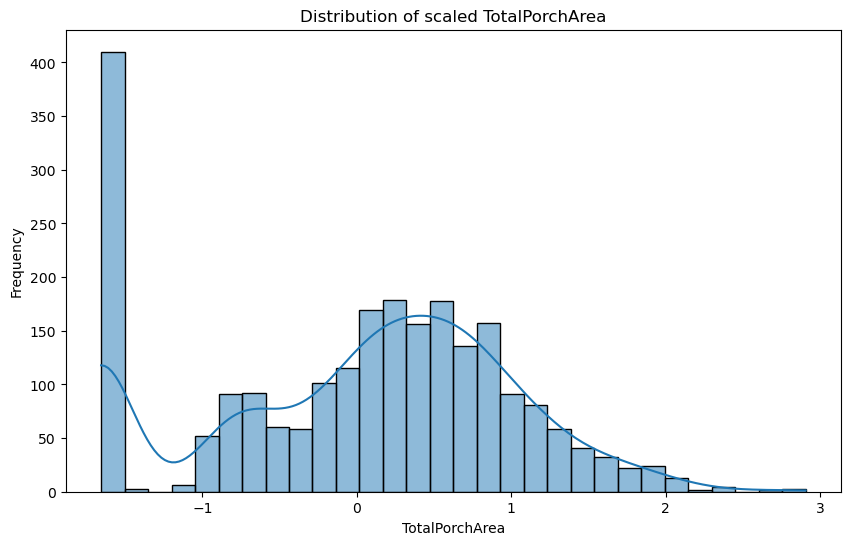

Skewness of TotalPorchArea after scaling: -0.27383786465451665
Kurtosis: -0.6905745820246354
Shapiro-Wilk Test p-value: 3.89072476412848e-29
Data is not normally distributed.


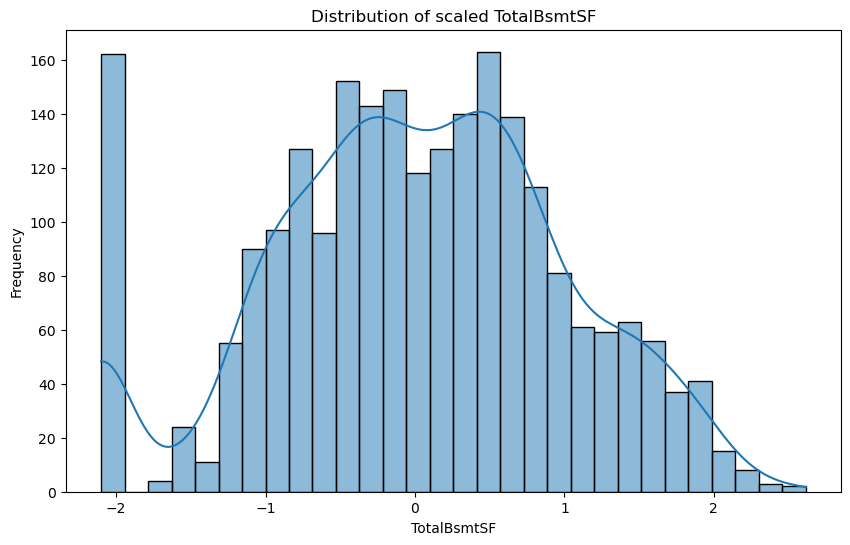

Skewness of TotalBsmtSF after scaling: -0.1801592361256673
Kurtosis: -0.30175825993294136
Shapiro-Wilk Test p-value: 5.441890417742062e-16
Data is not normally distributed.


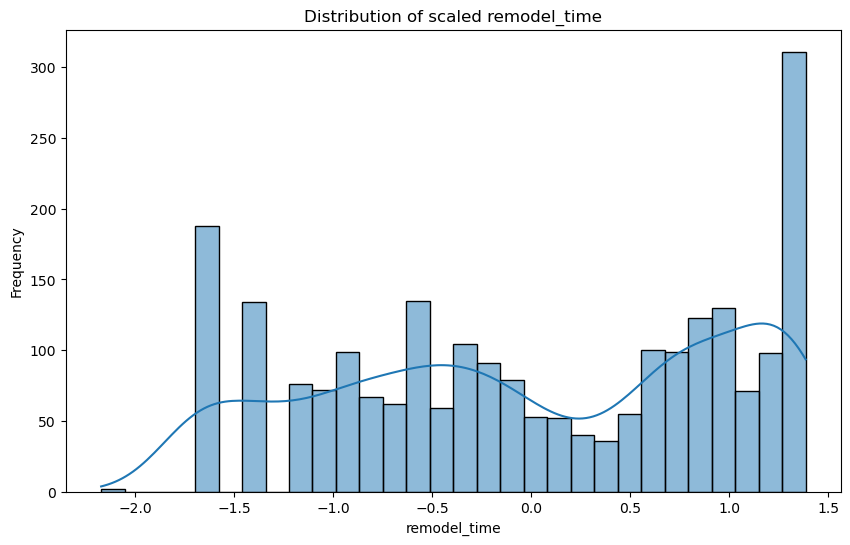

Skewness of remodel_time after scaling: -0.1773863849345182
Kurtosis: -1.2899230125810526
Shapiro-Wilk Test p-value: 1.3744692102570708e-32
Data is not normally distributed.


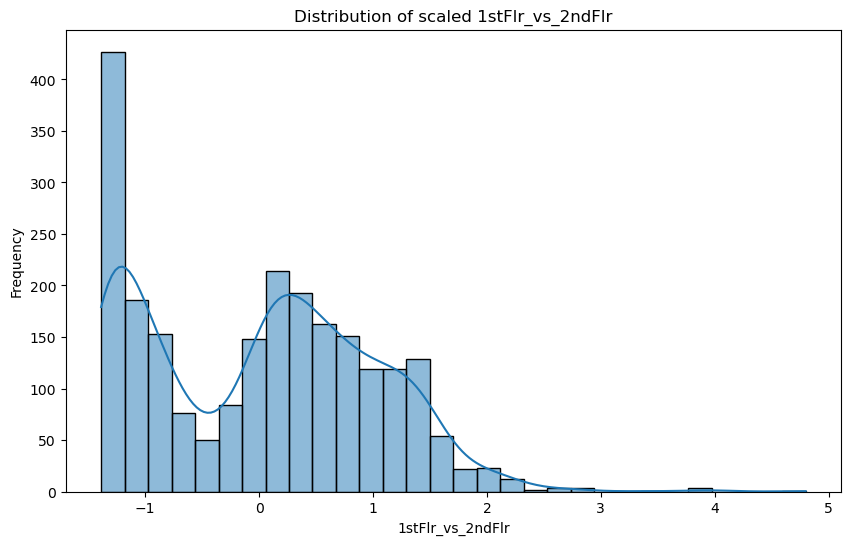

Skewness of 1stFlr_vs_2ndFlr after scaling: 0.25704972408270915
Kurtosis: -0.589299472733182
Shapiro-Wilk Test p-value: 4.055451023337554e-29
Data is not normally distributed.


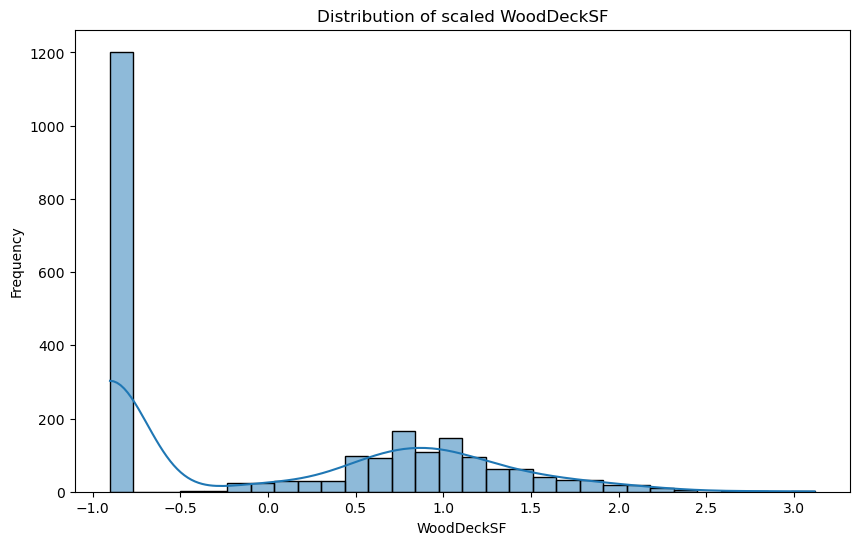

Skewness of WoodDeckSF after scaling: 0.4782125518066818
Kurtosis: -1.229739856323359
Shapiro-Wilk Test p-value: 2.0319131652853364e-47
Data is not normally distributed.


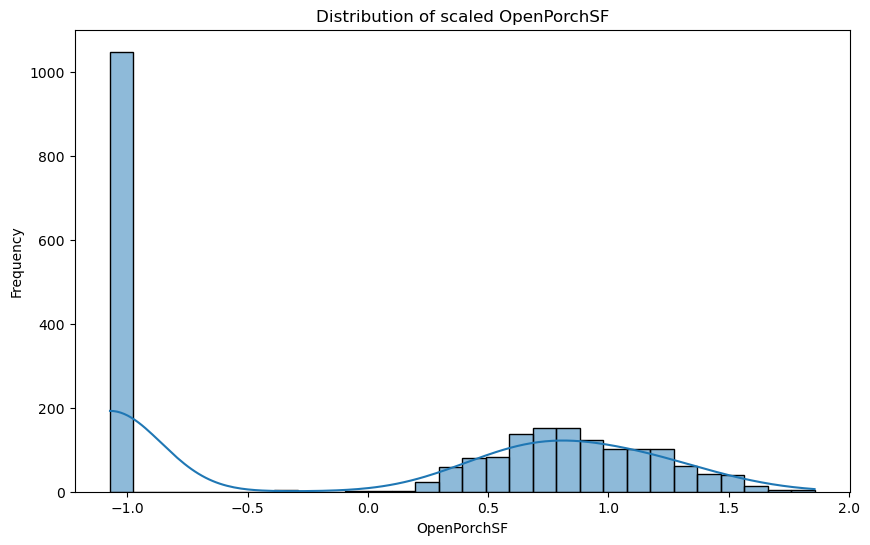

Skewness of OpenPorchSF after scaling: -0.019971422757422374
Kurtosis: -1.7696132777524773
Shapiro-Wilk Test p-value: 1.566540886360804e-48
Data is not normally distributed.


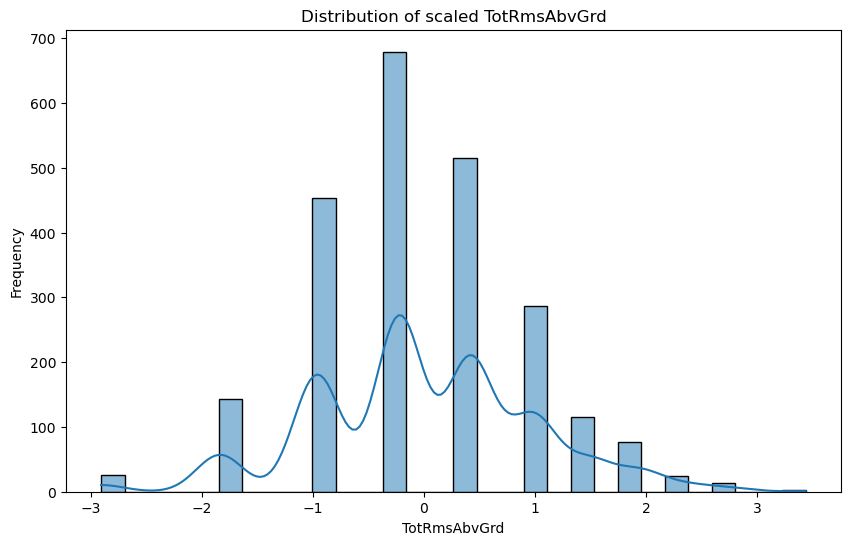

Skewness of TotRmsAbvGrd after scaling: 0.009381245621749811
Kurtosis: 0.2820666646472101
Shapiro-Wilk Test p-value: 2.988400356098932e-25
Data is not normally distributed.


In [75]:
for item in stand_feat:
    plt.figure(figsize=(10, 6))
    sns.histplot(training[item], kde=True, bins=30)
    plt.title(f'Distribution of scaled {item}')
    plt.xlabel(item)
    plt.ylabel('Frequency')
    plt.show()
    feature_skewness = skew(training[item].dropna())
    print(f'Skewness of {item} after scaling: {feature_skewness}')
    print("Kurtosis:", kurtosis(training[item]))
    # Shapiro-Wilk Test
    stat, p = shapiro(training[item])
    print("Shapiro-Wilk Test p-value:", p)
    if p < 0.05:
        print("Data is not normally distributed.")
    else:
        print("Data is approximately normal.")

In [76]:
r_scaler = RobustScaler()
r_feat=['GrLivArea','BsmtFinSF1','GarageArea','GarageAge']
training[r_feat] = r_scaler.fit_transform(training[r_feat])
validation[r_feat] = r_scaler.transform(validation[r_feat])
test_data[r_feat] = r_scaler.transform(test_data[r_feat])

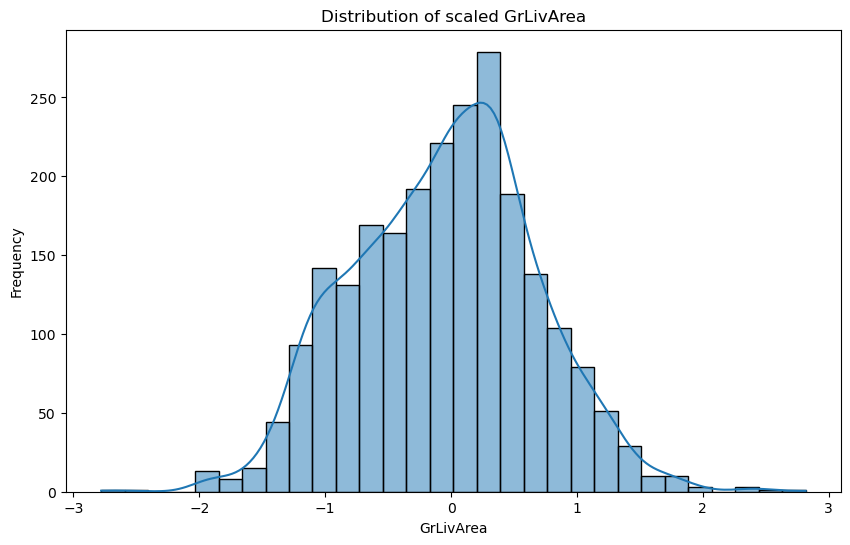

Skewness of GrLivArea after scaling: 0.0006126186486464115


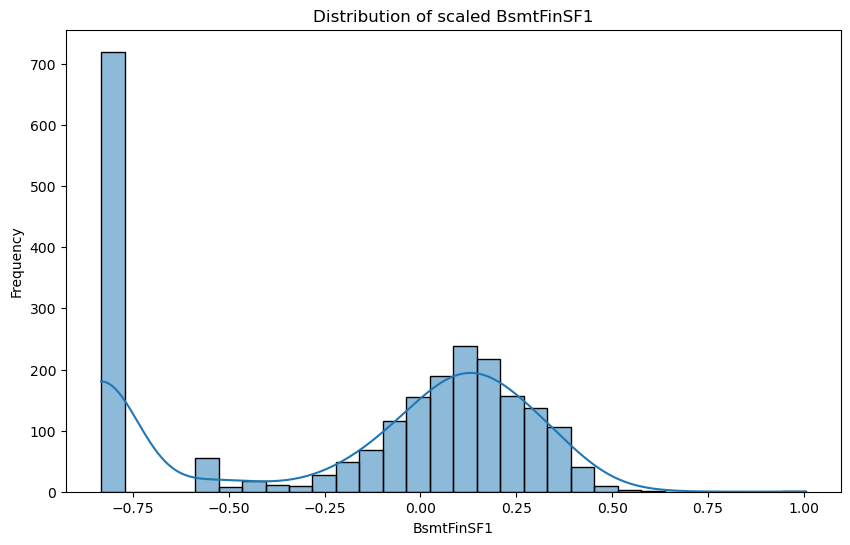

Skewness of BsmtFinSF1 after scaling: -0.43744282372892707


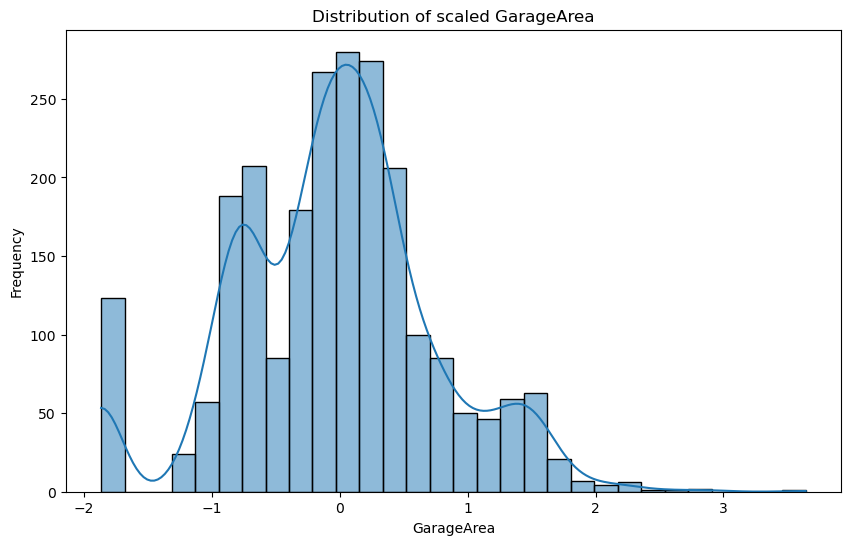

Skewness of GarageArea after scaling: 0.04113852995937421


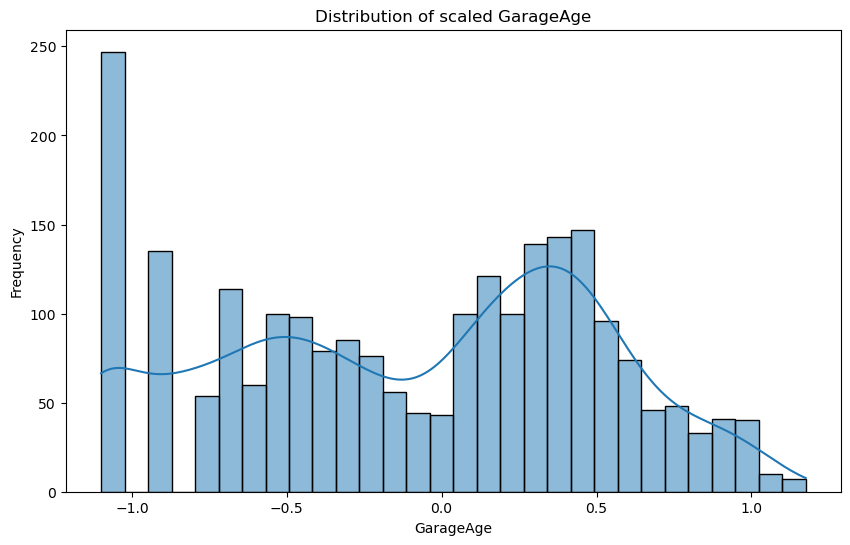

Skewness of GarageAge after scaling: -0.13163238906982527


In [77]:
for item in r_feat:
    plt.figure(figsize=(10, 6))
    sns.histplot(training[item], kde=True, bins=30)
    plt.title(f'Distribution of scaled {item}')
    plt.xlabel(item)
    plt.ylabel('Frequency')
    plt.show()
    feature_skewness = skew(training[item].dropna())
    print(f'Skewness of {item} after scaling: {feature_skewness}')

In [78]:
#minmax_scaler = MinMaxScaler()
#minmax_feat=['YrSold']
#training[minmax_feat] = s_scaler.fit_transform(training[minmax_feat])
#validation[minmax_feat] = s_scaler.transform(validation[minmax_feat])
#test_data[minmax_feat] = s_scaler.transform(test_data[minmax_feat])

In [79]:
#for item in minmax_feat:
#    plt.figure(figsize=(10, 6))
#    sns.histplot(training[item], kde=True, bins=30)
#    plt.title(f'Distribution of scaled {item}')
#    plt.xlabel(item)
#    plt.ylabel('Frequency')
#    plt.show()
#    feature_skewness = skew(training[item].dropna())
#    print(f'Skewness of {item} after scaling: {feature_skewness}')

In [80]:
from vif_mod import calculate_vif,vif_selection
vif_data=calculate_vif(training.loc[:,training.columns!='SalePrice'])
vif_data.to_csv('vif.csv')
vif_data

,Feature,VIF
0,ExteriorScore,inf
1,GarageType_NA,inf
2,has_garage,inf
3,ExterQual,inf
4,ExterCond,inf
...,...,...
162,SaleType_CWD,1.301275
163,SaleType_ConLI,1.272890
164,SaleType_ConLw,1.243881
165,SaleType_Con,1.226232


In [81]:
best_features=vif_data[vif_data['VIF']<10]['Feature'].values
best_features

array(['Neighborhood_Somerst', 'MSZoning_Residential Low Density',
       'Neighborhood_Sawyer', 'MSSubClass_Multi/Split-Level',
       'Exterior1st_Cement-based', 'ScreenPorch', 'GarageCars',
       'Foundation_Poured Concrete', 'LuxuryCount',
       'HouseStyle_Other Styles', 'Neighborhood_BrkSide', 'WoodDeckSF',
       'Neighborhood_NWAmes', 'Neighborhood_Gilbert', 'has_bsmt',
       'FireplaceQu', 'has_ScreenPorch', 'GarageArea', 'EnclosedPorch',
       'has_EnclosedPorch', 'Exterior2nd_Shingles-based',
       'Foundation_Cinder Block', 'Neighborhood_Crawfor',
       'Neighborhood_Mitchel', 'Neighborhood_NridgHt', 'BsmtQual',
       'MoSold_6', 'MoSold_7', 'Neighborhood_IDOTRR', 'Fireplaces',
       'Neighborhood_SawyerW', 'TotRmsAbvGrd', 'Exterior1st_Other',
       'FullBath', 'Exterior1st_Shingles-based', 'Total_Bathrooms',
       'MoSold_5', 'SaleType_WD', 'BsmtFinType1', 'OverallQual',
       'Neighborhood_NoRidge', 'BsmtCond', 'LotArea', 'MoSold_4',
       'Neighborhood_ClearC

In [82]:
redundancies=['YearBuilt','YearRemodAdd','GarageYrBlt','BsmtUnfSF','2ndFlrSF','1stFlrSF','ExterQual','ExterCond']
#redundancies=['YearBuilt','YearRemodAdd','GarageYrBlt','OpenPorchSF','BsmtUnfSF','2ndFlrSF','1stFlrSF','ExterQual','ExterCond']
filtered_columns=[col for col in training.columns if col not in redundancies+['SalePrice']]
vif_data=calculate_vif(training.loc[:,filtered_columns])
vif_data.to_csv('vif_2.csv')
vif_data

,Feature,VIF
0,has_garage,2.830881e+06
1,GarageType_NA,1.574804e+05
2,MSSubClass_Duplex/Multi-Family,8.209231e+01
3,MasVnrArea,6.011505e+01
4,MasVnrType_None,5.877086e+01
...,...,...
154,SaleType_CWD,1.288876e+00
155,SaleType_ConLI,1.263588e+00
156,SaleType_ConLw,1.237325e+00
157,SaleType_Con,1.220927e+00


In [83]:
best_features=vif_data[vif_data['VIF']<10]['Feature'].values
best_features

array(['Neighborhood_Somerst', 'MSZoning_Residential Low Density',
       'BsmtFinSF1', 'Neighborhood_Sawyer', 'Exterior1st_Cement-based',
       'MSSubClass_Multi/Split-Level', 'ScreenPorch', 'GarageCars',
       '1stFlr_vs_2ndFlr', 'Foundation_Poured Concrete',
       'HouseStyle_Other Styles', 'Neighborhood_BrkSide', 'LuxuryCount',
       'WoodDeckSF', 'has_bsmt', 'Neighborhood_NWAmes',
       'Neighborhood_Gilbert', 'has_ScreenPorch', 'FireplaceQu',
       'GarageArea', 'EnclosedPorch', 'has_EnclosedPorch',
       'Neighborhood_Crawfor', 'Exterior2nd_Shingles-based',
       'Neighborhood_NridgHt', 'Neighborhood_Mitchel', 'MoSold_6',
       'BsmtQual', 'Foundation_Cinder Block', 'MoSold_7',
       'Neighborhood_IDOTRR', 'Fireplaces', 'Exterior1st_Other',
       'Neighborhood_SawyerW', 'TotRmsAbvGrd', 'Total_Bathrooms',
       'FullBath', 'TotalBsmtSF', 'Exterior1st_Shingles-based',
       'MoSold_5', 'SaleType_WD', 'remodel_time', 'BsmtFinType1',
       'OverallQual', 'Neighborhood_

In [84]:
x_train=training.loc[:,best_features]
y_train=training.loc[:,'SalePrice'].values
x_valid=validation.loc[:,best_features]
y_valid=validation.loc[:,'SalePrice'].values
x_test=test_data.loc[:,best_features]

In [85]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)

In [86]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluate the model
mse=mean_squared_error(np.log1p(100000*np.exp(y_valid)), np.log1p(100000*np.exp(y_pred)))
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", np.sqrt(mse))
print("R² Score:", r2_score(np.log1p(100000*np.exp(y_valid)), np.log1p(100000*np.exp(y_pred))))

Mean Squared Error: 0.01795630912794003
Root Mean Squared Error: 0.13400115345749838
R² Score: 0.9015972407087458


In [87]:
y_pred=model.predict(x_test)
y_pred=100000*np.exp(y_pred)
results=pd.read_csv('sample_submission.csv')
results['SalePrice']=y_pred
results.to_csv('submission_test_1.csv',index=False)

In [88]:
from sklearn.linear_model import Ridge, Lasso
model = Ridge(alpha=1.0)
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)
mse=mean_squared_error(np.log1p(100000*np.exp(y_valid)), np.log1p(100000*np.exp(y_pred)))
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", np.sqrt(mse))
print("R² Score:", r2_score(np.log1p(100000*np.exp(y_valid)), np.log1p(100000*np.exp(y_pred))))

Mean Squared Error: 0.017928362944169118
Root Mean Squared Error: 0.1338968369460949
R² Score: 0.9017503891968413


In [89]:
coefficients = model.coef_
features = x_train.columns
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Step 5: Show features used in the model (non-zero coefficients)
print(coef_df[coef_df['Coefficient'] != 0]['Feature'].values)

['Neighborhood_Somerst' 'MSZoning_Residential Low Density' 'BsmtFinSF1'
 'Neighborhood_Sawyer' 'Exterior1st_Cement-based'
 'MSSubClass_Multi/Split-Level' 'ScreenPorch' 'GarageCars'
 '1stFlr_vs_2ndFlr' 'Foundation_Poured Concrete' 'HouseStyle_Other Styles'
 'Neighborhood_BrkSide' 'LuxuryCount' 'WoodDeckSF' 'has_bsmt'
 'Neighborhood_NWAmes' 'Neighborhood_Gilbert' 'has_ScreenPorch'
 'FireplaceQu' 'GarageArea' 'EnclosedPorch' 'has_EnclosedPorch'
 'Neighborhood_Crawfor' 'Exterior2nd_Shingles-based'
 'Neighborhood_NridgHt' 'Neighborhood_Mitchel' 'MoSold_6' 'BsmtQual'
 'Foundation_Cinder Block' 'MoSold_7' 'Neighborhood_IDOTRR' 'Fireplaces'
 'Exterior1st_Other' 'Neighborhood_SawyerW' 'TotRmsAbvGrd'
 'Total_Bathrooms' 'FullBath' 'TotalBsmtSF' 'Exterior1st_Shingles-based'
 'MoSold_5' 'SaleType_WD' 'remodel_time' 'BsmtFinType1' 'OverallQual'
 'Neighborhood_NoRidge' 'BsmtCond' 'MoSold_4' 'LotArea' 'OpenPorchSF'
 'Neighborhood_ClearCr' 'Neighborhood_Timber' 'Neighborhood_MeadowV'
 'Neighborhood_SWI

In [90]:
y_pred=model.predict(x_test)
y_pred=100000*np.exp(y_pred)
results=pd.read_csv('sample_submission.csv')
results['SalePrice']=y_pred
results.to_csv('submission_test_2.csv',index=False)

In [91]:
model = Lasso(alpha=0.001)
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)
mse=mean_squared_error(np.log1p(100000*np.exp(y_valid)), np.log1p(100000*np.exp(y_pred)))
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", np.sqrt(mse))
print("R² Score:", r2_score(np.log1p(100000*np.exp(y_valid)), np.log1p(100000*np.exp(y_pred))))

Mean Squared Error: 0.01887935975978658
Root Mean Squared Error: 0.1374021825146405
R² Score: 0.8965388109116165


In [92]:
coefficients = model.coef_
features = x_train.columns
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Step 5: Show features used in the model (non-zero coefficients)
print(coef_df[coef_df['Coefficient'] != 0]['Feature'].values)

['Neighborhood_Somerst' 'MSZoning_Residential Low Density' 'BsmtFinSF1'
 'MSSubClass_Multi/Split-Level' 'ScreenPorch' 'GarageCars'
 '1stFlr_vs_2ndFlr' 'Foundation_Poured Concrete' 'Neighborhood_BrkSide'
 'LuxuryCount' 'WoodDeckSF' 'Neighborhood_Gilbert' 'FireplaceQu'
 'GarageArea' 'EnclosedPorch' 'Neighborhood_Crawfor'
 'Neighborhood_NridgHt' 'BsmtQual' 'Foundation_Cinder Block' 'MoSold_7'
 'Neighborhood_IDOTRR' 'Fireplaces' 'TotRmsAbvGrd' 'Total_Bathrooms'
 'FullBath' 'TotalBsmtSF' 'SaleType_WD' 'remodel_time' 'BsmtFinType1'
 'OverallQual' 'Neighborhood_NoRidge' 'BsmtCond' 'LotArea' 'OpenPorchSF'
 'Neighborhood_ClearCr' 'BsmtFinSF2' 'Condition1_Road Proximity'
 'HasOutdoorSpace' 'Condition1_Railroad Proximity' 'BsmtFinType2'
 'HalfBath' 'SaleCondition_Normal' 'KitchenQual' 'BedroomAbvGr'
 'GarageFinish' 'Neighborhood_StoneBr' 'Alley_Pave' 'GarageType_Other'
 'Condition2_Road Proximity' 'Foundation_Other' 'CentralAir' 'OverallCond'
 'HeatingQC' 'Remodeled' 'BsmtExposure' 'PavedDrive' '

In [93]:
y_pred=model.predict(x_test)
y_pred=100000*np.exp(y_pred)
results=pd.read_csv('sample_submission.csv')
results['SalePrice']=y_pred
results.to_csv('submission_test_3.csv',index=False)

In [94]:
vif_data,best_features_tem=vif_selection(training.loc[:,training.columns!='SalePrice'],10,redundancies)
vif_data.to_csv('vif_3.csv')

Dropped 'has_garage' with VIF: 2830881.31
Dropped 'YrSold' with VIF: 3177.23
Dropped 'Electrical_Romex_Wiring' with VIF: 524.46
Dropped 'Condition2_Road Proximity' with VIF: 502.44
Dropped 'GarageCond' with VIF: 383.22
Dropped 'has_bsmt' with VIF: 363.33
Dropped 'RoofMatl_Standard Roofing' with VIF: 281.51
Dropped 'ExteriorScore' with VIF: 219.65
Dropped 'GarageQual' with VIF: 172.88
Dropped 'MasVnrType_None' with VIF: 143.88
Dropped 'Vintage_20th Century' with VIF: 103.02
Dropped 'BsmtCond' with VIF: 99.92
Dropped 'OverallQual' with VIF: 98.87
Dropped 'MSSubClass_Duplex/Multi-Family' with VIF: 86.17
Dropped 'Exterior2nd_Vinyl-based' with VIF: 73.39
Dropped 'BsmtQual' with VIF: 67.74
Dropped 'HouseStyle_1Story' with VIF: 62.00
Dropped 'Condition1_Road Proximity' with VIF: 60.92
Dropped 'OverallCond' with VIF: 55.52
Dropped 'GarageCars' with VIF: 52.29
Dropped 'Total_Bathrooms' with VIF: 51.62
Dropped 'SaleType_New' with VIF: 47.69
Dropped 'KitchenQual' with VIF: 43.30
Dropped 'MSZoning

In [95]:
best_features_tem

array(['MSSubClass_2-Story', 'Neighborhood_NAmes', 'LuxuryCount',
       'BsmtFinType2', 'Neighborhood_OldTown', 'GrLivArea', 'GarageAge',
       'has_ScreenPorch', 'ScreenPorch', 'Fireplaces',
       'has_EnclosedPorch', 'BsmtExposure', 'EnclosedPorch',
       'MSSubClass_Multi/Split-Level', 'MoSold_6', 'Vintage_21st Century',
       'Exterior2nd_Cement-based', 'MoSold_7', 'Exterior1st_Cement-based',
       '1stFlr_vs_2ndFlr', 'HouseStyle_Other Styles', 'GarageType_NA',
       'MoSold_5', 'MSZoning_Residential Medium Density',
       'Neighborhood_Edwards', 'Foundation_Cinder Block',
       'Neighborhood_CollgCr', 'TotRmsAbvGrd', 'MoSold_4', 'GarageArea',
       'LotArea', 'Exterior1st_Shingles-based', 'Neighborhood_Sawyer',
       'Exterior2nd_Shingles-based', 'Neighborhood_BrkSide', 'BsmtFinSF2',
       'LotShape_Reg', 'Neighborhood_Somerst', 'remodel_time',
       'BsmtFinSF1', 'Remodeled', 'Neighborhood_Gilbert', 'TotalBsmtSF',
       'HalfBath', 'Exterior1st_Other', 'MoSold_8', '

In [96]:
x_train=training.loc[:,best_features_tem]
y_train=training.loc[:,'SalePrice'].values
x_valid=validation.loc[:,best_features_tem]
y_valid=validation.loc[:,'SalePrice'].values
x_test=test_data.loc[:,best_features_tem]

In [97]:
model = Lasso(alpha=0.0001)
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)
mse=mean_squared_error(np.log1p(100000*np.exp(y_valid)), np.log1p(100000*np.exp(y_pred)))
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", np.sqrt(mse))
print("R² Score:", r2_score(np.log1p(100000*np.exp(y_valid)), np.log1p(100000*np.exp(y_pred))))

Mean Squared Error: 0.02060445324060301
Root Mean Squared Error: 0.1435425137044876
R² Score: 0.8870850886940839


In [98]:
coefficients = model.coef_
features = x_train.columns
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Step 5: Show features used in the model (non-zero coefficients)
print(coef_df[coef_df['Coefficient'] != 0]['Feature'].values)

['MSSubClass_2-Story' 'Neighborhood_NAmes' 'LuxuryCount' 'BsmtFinType2'
 'Neighborhood_OldTown' 'GrLivArea' 'GarageAge' 'has_ScreenPorch'
 'ScreenPorch' 'Fireplaces' 'has_EnclosedPorch' 'BsmtExposure'
 'EnclosedPorch' 'MSSubClass_Multi/Split-Level' 'MoSold_6'
 'Vintage_21st Century' 'Exterior2nd_Cement-based' 'MoSold_7'
 'Exterior1st_Cement-based' '1stFlr_vs_2ndFlr' 'HouseStyle_Other Styles'
 'GarageType_NA' 'MoSold_5' 'MSZoning_Residential Medium Density'
 'Neighborhood_Edwards' 'Foundation_Cinder Block' 'Neighborhood_CollgCr'
 'TotRmsAbvGrd' 'MoSold_4' 'GarageArea' 'LotArea'
 'Exterior1st_Shingles-based' 'Neighborhood_Sawyer'
 'Exterior2nd_Shingles-based' 'Neighborhood_BrkSide' 'BsmtFinSF2'
 'LotShape_Reg' 'Neighborhood_Somerst' 'remodel_time' 'BsmtFinSF1'
 'Remodeled' 'Neighborhood_Gilbert' 'TotalBsmtSF' 'HalfBath'
 'Exterior1st_Other' 'MoSold_8' 'Neighborhood_NWAmes'
 'Neighborhood_NridgHt' 'Exterior1st_Wood-based' 'Neighborhood_Crawfor'
 'Neighborhood_IDOTRR' 'MoSold_3' 'GarageTyp

In [99]:
y_pred=model.predict(x_test)
y_pred=100000*np.exp(y_pred)
results=pd.read_csv('sample_submission.csv')
results['SalePrice']=y_pred
results.to_csv('submission_test_4.csv',index=False)

In [100]:
x_valid

,MSSubClass_2-Story,Neighborhood_NAmes,LuxuryCount,BsmtFinType2,Neighborhood_OldTown,GrLivArea,GarageAge,has_ScreenPorch,ScreenPorch,Fireplaces,...,RoofMatl_Specialty Roofing,SaleCondition_Family,Condition2_Railroad Proximity,SaleType_ConLI,has_3SsnPorch,SaleType_ConLD,SaleType_CWD,SaleType_Con,SaleType_ConLw,SaleType_Oth
0,1.0,0.0,0,1.0,0.0,0.149309,-0.879844,0,0,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1,1.0,0.0,0.036039,0.084721,0,0,2,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,2,1.0,0.0,0.133576,-0.607957,0,0,1,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0,1.0,0.0,0.785314,0.308633,0,0,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1,1.0,0.0,-0.572417,0.084721,0,0,1,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,1.0,0.0,1,1.0,0.0,0.359182,-0.370277,1,291,1,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
580,0.0,0.0,2,1.0,0.0,0.650193,-0.192882,0,0,0,...,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
581,1.0,0.0,2,1.0,0.0,1.029237,-0.306724,0,0,1,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
582,0.0,1.0,0,0.0,0.0,-0.746027,-0.068096,0,0,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [101]:
x_test

,MSSubClass_2-Story,Neighborhood_NAmes,LuxuryCount,BsmtFinType2,Neighborhood_OldTown,GrLivArea,GarageAge,has_ScreenPorch,ScreenPorch,Fireplaces,...,RoofMatl_Specialty Roofing,SaleCondition_Family,Condition2_Railroad Proximity,SaleType_ConLI,has_3SsnPorch,SaleType_ConLD,SaleType_CWD,SaleType_Con,SaleType_ConLw,SaleType_Oth
0,0.0,1.0,0,2.0,0.0,-1.085869,0.439922,1,120,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0,1.0,0.0,-0.196336,0.486356,0,0,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1,1.0,0.0,0.251160,-0.306724,0,0,1,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1,1.0,0.0,0.217434,-0.337838,0,0,1,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0,1.0,0.0,-0.279796,-0.166589,1,144,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.0,0.0,0,1.0,0.0,-0.635720,-1.099805,0,0,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1455,1.0,0.0,0,1.0,0.0,-0.635720,0.219961,0,0,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1456,0.0,0.0,1,1.0,0.0,-0.379538,0.392043,0,0,1,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1457,0.0,0.0,0,1.0,0.0,-0.904372,-1.099805,0,0,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [102]:
x_train

,MSSubClass_2-Story,Neighborhood_NAmes,LuxuryCount,BsmtFinType2,Neighborhood_OldTown,GrLivArea,GarageAge,has_ScreenPorch,ScreenPorch,Fireplaces,...,RoofMatl_Specialty Roofing,SaleCondition_Family,Condition2_Railroad Proximity,SaleType_ConLI,has_3SsnPorch,SaleType_ConLD,SaleType_CWD,SaleType_Con,SaleType_ConLw,SaleType_Oth
0,0.0,0.0,2,1.0,0.0,0.170418,-1.099805,0,0,1,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0,1.0,0.0,-0.903502,0.144482,0,0,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1,1.0,0.0,0.638973,-0.192882,0,0,1,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1,4.0,0.0,0.785603,0.219961,0,0,2,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0,1.0,0.0,-1.309676,0.439922,0,0,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,0.0,0.0,1,1.0,0.0,-1.031717,0.124886,0,0,1,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2332,0.0,0.0,1,1.0,0.0,-0.221525,-0.879844,0,0,1,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2333,0.0,0.0,1,1.0,0.0,0.673888,0.064119,0,0,2,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2334,0.0,0.0,0,1.0,0.0,-1.169463,0.439922,0,0,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
